**Overview Of Credit EDA Case Study**

- Import Data

- Data Cleaning
  - Data Cleaning of Application Data Dataframe
  - Data Cleaning of Previous Application DataFrame

- Univariate Analysis
  - Derived Attributes Creation
  - Binning of Continous Variables
  - Data Imbalance Analysis(Application Data Dataframe)
  - Treatment Of Outliers
  - Splitting the Application Data DF based on Target variable
  - Univariate Analysis-Categorical Variable-Target(0)
  - Univariate Analysis-Categorical Variable-Target(1)
  - Univariate Analysis-Continous Variable-Target(0)
  - Univariate Analysis-Continous Variable-Target(1)

- Bivariate Analysis
  - Continous-Categorical Variable
  - Categorical-Categorical
  - Correlation Analysis(Continous-Continous Variable)

- Merged Dataframe

- Inferences from Case Study


In [0]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_info_columns',500)

#### Import Data

Note - Please change the reading directory of the dataset in the below query as per your requirments

In [0]:
# Load the given csv files as dataframe
application_data=pd.read_csv("/content/drive/My Drive/application_data.csv")
previous_application=pd.read_csv("/content/drive/My Drive/previous_application.csv")

In [66]:
# Review of Application_Data dataframe(Shape, Numerical Description)
print(application_data.shape)

(307511, 122)


In [67]:
#Understanding the dataframe application_data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [68]:
#Further insights on the dataframe application_data to understand how the data is spread 
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [69]:
# Checking the datatype of Columns of Application_Data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [70]:
# Review of Previous_Application dataframe(Shape)
print(previous_application.shape)

(1670214, 37)


In [71]:
#Further insights on the dataframe previous_application to understand how the data is spread 
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [72]:
# Checking the datatype of Columns of Previous Application Dataframe
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Data Cleaning


##### Data Cleaning of Application Data Dataframe

In [73]:
# Identifying the percentage of the null values in 'application_data' dataframe
print(round((application_data.isnull().sum()/len(application_data))*100,2).sort_values(ascending=True))

SK_ID_CURR                       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_16                 0.00
WEEKDAY_APPR_PROCESS_START       0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMEN

In [74]:
# Since there are many columns with null values, therefore removing columns with more than 45% of null values in application_data dataframe
Drop_Null_Columns=application_data.columns[round((application_data.isnull().sum()/len(application_data))*100,2)>45]
application_data.drop(Drop_Null_Columns,axis=1,inplace=True)
print(application_data.shape)

(307511, 73)


In [75]:
# Quick review of application_data dataframe
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [76]:
application_data.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

In [0]:
# Reporting The 5 Columns having NUll Values which Can be Imputed with either Mean/Median/Mode/0

# 1) Null Values in OCCUPATION_TYPE can be imputed with mode value 'Laborers'.
# 2) Null Values in NAME_TYPE_SUITE can be imputed with mode value 'Unaccompanied'.
# 3) Null Values in AMT_GOODS_PRICE can be imputed with median value 450000.
# 4) Null Values in AMT_REQ_CREDIT_BUREAU_WEEK can be imputed with median value 0
# 5) Null Values in AMT_REQ_CREDIT_BUREAU_DAY can be imputed with  0

In [78]:
# EXT_SOURCE and FLAG_DOCUMENT columns will not help in numerical analysis, So Dropping these two categories of Columns

# List of columns
app_col_list=list(application_data.columns)

#flagext_col contains list of column names starting with Flag_Document and Ext_Source
flagext_col = [c for c in app_col_list if c.startswith("FLAG_DOCUMENT") or c.startswith("EXT_SOURCE")]

# Drop FLAG_DOCUMENT/EXT_SOURCE columns from dataframe
application_data.drop(flagext_col, axis=1,inplace=True)

# Reviewing size of application_data dataframe
print(application_data.shape)

(307511, 51)


In [0]:
# Dropping the columns that are not required for the analysis
application_data.drop(['FLAG_WORK_PHONE','FLAG_PHONE','REG_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],axis=1,inplace=True)

In [80]:
print(application_data.shape)

(307511, 38)


In [0]:
#changing of the data type for the columns which can be just integers but they are having float.
application_data.DAYS_REGISTRATION = application_data.DAYS_REGISTRATION.astype(np.int64,errors='ignore')
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.astype(np.int64,errors='ignore')

In [82]:
# Quick Review of application_data dataframe for percentage of null values
# Occupation_Type Column has been left not imputed or dropped although had around 31% of null values as it will help in Categorical Analysis.
print(round((application_data.isnull().sum()/len(application_data))*100,2).sort_values(ascending=True))

SK_ID_CURR                      0.00
ORGANIZATION_TYPE               0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_LIVE_REGION      0.00
WEEKDAY_APPR_PROCESS_START      0.00
REGION_RATING_CLIENT_W_CITY     0.00
CNT_FAM_MEMBERS                 0.00
FLAG_EMAIL                      0.00
FLAG_CONT_MOBILE                0.00
FLAG_EMP_PHONE                  0.00
FLAG_MOBIL                      0.00
DAYS_ID_PUBLISH                 0.00
DAYS_REGISTRATION               0.00
DAYS_BIRTH                      0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_EMPLOYED                   0.00
NAME_FAMILY_STATUS              0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
NAME_HOUSING_TYPE               0.00
AMT_INCOME_TOTAL                0.00
CNT_CHILDREN                    0.00
AMT_ANNUITY                     0.00
NAME_INCOME_TYPE                0.00
N

##### Data Cleaning of Previous Application DataFrame


In [83]:
# Identifying the percentage of the null values in 'previous_application' dataframe
print(round((previous_application.isnull().sum()/len(previous_application))*100,2).sort_values(ascending=True))

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

In [84]:
# There are two columns with more than 90% missing values, we will be filtering them out for our analysis.
# There are columns which have % missing value between 20 and 90. 
# We will not drop or impute such columns as doing so might result in distorting data for cancelled, refused or unused applications.
Drop_PrevNull_Columns=previous_application.columns[round((previous_application.isnull().sum()/len(previous_application))*100,2)>90]
previous_application.drop(Drop_PrevNull_Columns,axis=1,inplace=True)
print(previous_application.shape)

(1670214, 35)


### Univariate Analysis

#### Derived Attributes Creation

In [0]:
#Creating few Derived Columns/Attributes for better Understanding and Representation

# Derived column AGE_YEAR for Age in years for application_data dataframe
application_data["AGE_IN_YEAR"]=(application_data["DAYS_BIRTH"].abs()//365).astype(int)

# Derived column Loan_T0_Value for GOODS_PRICE to CREDIT Ratio for application_data dataframe
application_data["Loan_T0_Value"]=round((application_data["AMT_GOODS_PRICE"]/application_data["AMT_CREDIT"]),2)

# Derived column pr_Loan_To_Value for GOODS_PRICE to CREDIT Ratio for previous_application dataframe
previous_application["pr_Loan_To_Value"]=round((previous_application["AMT_GOODS_PRICE"]/previous_application["AMT_CREDIT"]),2)



#### Binning of Continous Variables

In [86]:
#Binning continuous data variable column 'AMT_INCOME_TOTAL'

bins = [0, 20000, 50000, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2500000, 5000000, 10000000]

AMT_INCOME_TOTAL_Range = ['0 -20000', '20000-50000','50000-100000','100000-250000', '250000-500000', '500000-750000','750000-1000000','1000000-1250000',
'1250000-1500000','1500000-1750000','1750000-2000000','2000000-2500000','2500000-5000000','5000000 - Above']

application_data['BIN_AMOUNT_INCOME_TOTAL'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins,labels=AMT_INCOME_TOTAL_Range)
IncomeGroup = application_data.groupby(pd.cut(application_data.AMT_INCOME_TOTAL, bins))
print(IncomeGroup.AMT_INCOME_TOTAL.count())

AMT_INCOME_TOTAL
(0, 20000]                  0
(20000, 50000]           4517
(50000, 100000]         59181
(100000, 250000]       204035
(250000, 500000]        37076
(500000, 750000]         2058
(750000, 1000000]         394
(1000000, 1250000]         99
(1250000, 1500000]         67
(1500000, 1750000]         20
(1750000, 2000000]         20
(2000000, 2500000]         25
(2500000, 5000000]         14
(5000000, 10000000]         2
Name: AMT_INCOME_TOTAL, dtype: int64


In [87]:
# Binning Age_In_Years calculated previously.

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
AGE_IN_YEAR_Range = ['0-20','20-30','30-40','40-50','50-60','60-70', '70-80', '80-90','90-100']
application_data['BIN_AGE_IN_YEAR'] = pd.cut(application_data['AGE_IN_YEAR'], bins,labels=AGE_IN_YEAR_Range)
AgeGroup = application_data.groupby(pd.cut(application_data.AGE_IN_YEAR, bins))
print(AgeGroup.AGE_IN_YEAR.count())

AGE_IN_YEAR
(10, 20]         1
(20, 30]     52805
(30, 40]     83117
(40, 50]     74401
(50, 60]     67819
(60, 70]     29368
(70, 80]         0
(80, 90]         0
(90, 100]        0
Name: AGE_IN_YEAR, dtype: int64


In [88]:
#Quick Review of Application Data Dataframe after above operations
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEAR,Loan_T0_Value,BIN_AMOUNT_INCOME_TOTAL,BIN_AGE_IN_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,1,0,Laborers,1.0,2,WEDNESDAY,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25,0.86,100000-250000,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,1,0,Core staff,2.0,1,MONDAY,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,0.87,250000-500000,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,Laborers,1.0,2,MONDAY,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52,1.00,50000-100000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,1,0,Laborers,2.0,2,WEDNESDAY,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52,0.95,100000-250000,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,1,0,Core staff,1.0,2,THURSDAY,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54,1.00,100000-250000,50-60


#### Data Imbalance Analysis(Application Data Dataframe)

In [89]:
#To find data Imbalance in Overall Application Data Dataframe
print(application_data.TARGET.value_counts(normalize=True)*100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


-  Majority of the population (approx 91%) belongs to other cases
-  Approx. 8% of population belongs to "Clients with difficulty in paying".

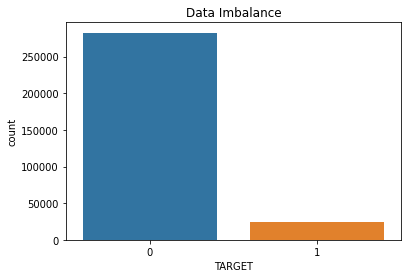

In [90]:
sns.countplot(x = 'TARGET', data=application_data)
plt.title("Data Imbalance")
plt.show()

#### Treatment Of Outliers

In [91]:
# Finding out the numerical value columns
num_col_list=list(application_data.select_dtypes(exclude='object'))
print(num_col_list)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_IN_YEAR', 'Loan_T0_Value', 'BIN_AMOUNT_INCOME_TOTAL', 'BIN_AGE_IN_YEAR']


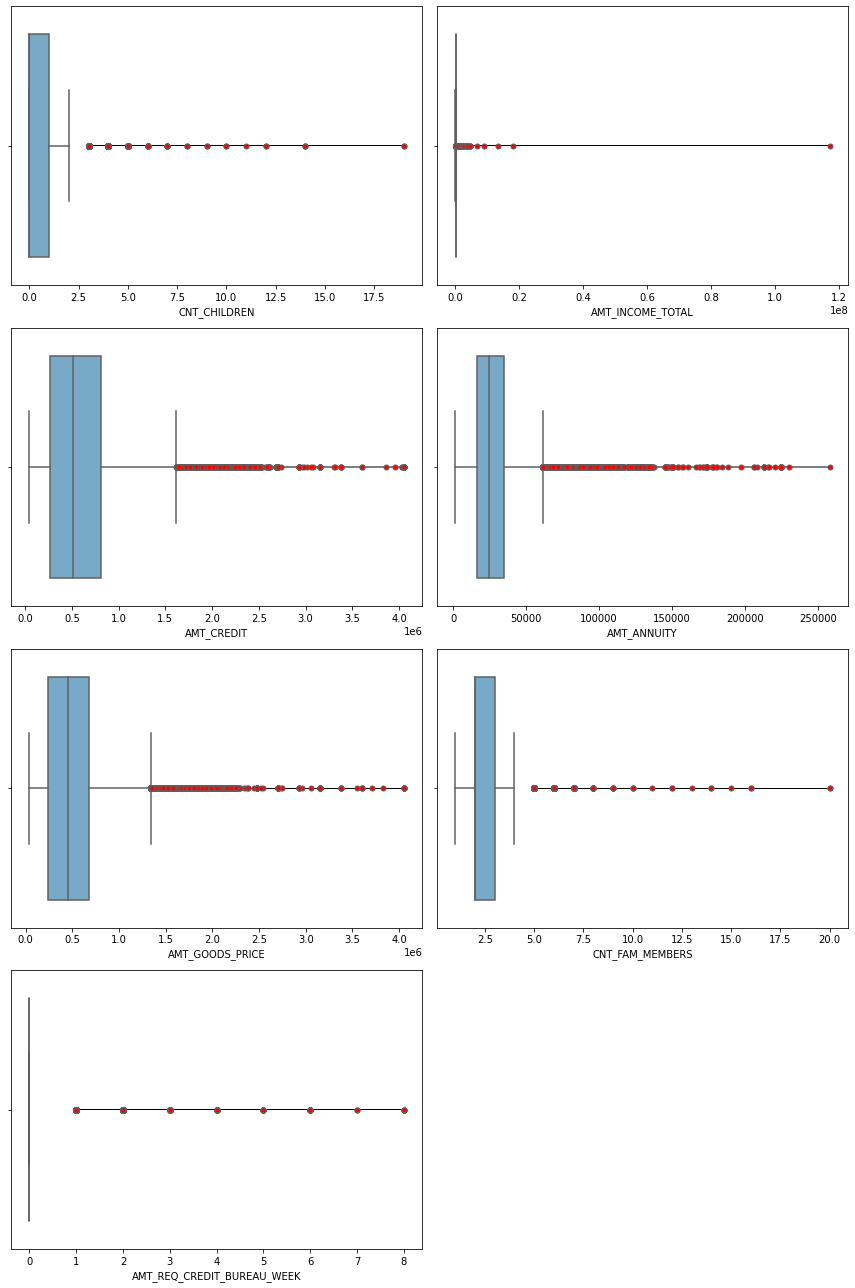

In [92]:
#Selecting few columns for identification of Outliers
outlier_list=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_WEEK']

# Exploring Outliers using boxplot for quantitative variables

# Number of numerical columns
size=len(outlier_list)

# calculation for subplots
n=2
m=(size//n)+1
count=1

# Setting figure size
plt.figure(1,figsize=(12,18))

# Running in loop to plot all columns as subplot
for column in outlier_list:
    plt.subplot(m,n,count)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                  linestyle='-')
    data = application_data[column]
    sns.boxplot(x=data,palette="Blues",flierprops=flierprops)
    count+=1

# Show graphs
plt.tight_layout()
plt.show()

**Treating the Outliers using given criteria:**

- Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
- Upper cutoff = 75th percentile + 1.5 * (IQR)
- Lower cutoff = 25th percentile - 1.5 * (IQR)

In [0]:
## Removing Outliers from application_data DataFrame
np.warnings.filterwarnings('ignore')

def appoutlier_remove(application_data,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=application_data[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (application_data[col] > lower_cutoff) & (application_data[col] < upper_cutoff)
    mask2 = (application_data[col].isnull()==True)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return application_data
        pass
    else:
        application_data = application_data.loc[mask1 | mask2]
        return application_data

for column in outlier_list:
  application_data = appoutlier_remove(application_data,column)

np.warnings.filterwarnings('default')

In [94]:
#Overview of Outlier_list variables after treating Outliers
application_data[outlier_list].quantile([0.25,0.50,0.75,0.95,0.99])

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_WEEK
0.25,0.0,112500.0,269550.0,15808.50,225000.0,2.0,0.0
0.50,0.0,135000.0,472500.0,23562.00,450000.0,2.0,0.0
0.75,1.0,180000.0,752553.0,31560.75,675000.0,3.0,0.0
0.95,2.0,270000.0,1129500.0,45756.00,1080000.0,4.0,0.0
0.99,2.0,315000.0,1314117.0,53455.50,1170000.0,4.0,1.0


**Observations**

Based on the above plots and quantiles range outliers can be identified:

- There are outliers found in CNT_FAM_MEMBERS i.e there are some applicants who might have more number of dependents on him/her, but 25th-99th percentile are between 2 and 5.

- There are outliers found in CNT_CHILDREN i.e there are some applicants who might have more number of dependents on him/her depending on the age of the children but 75th-99th percentile are in 1 and 3.

- There are outliers found in AMT_INCOME_TOTAL i.e. there are applicants who has more income than the 75th percentile of the population for these applicants there should not be any difficulty in the loan clearance.

- There are outliers found in AMT_Annuity i.e. these applicants needs to keep some amount of money separate for the purpose of annuity and this might be a risk in terms of the loan clearance.

- There are lot of outliers found in AMT_CREDIT i.e., for these customers representing the outliers there is risk that the loan payment can be delayed because of prior credit history.

- There are Outliers in AMT_GOODS_PRICE, this is an interesting variable to look at as this means there are some loans whcih whose worth is higher than normal goods/properties. So care should be taken while lending such high valued loans.

#### Splitting the Application Data DF based on Target variable

In [95]:
#Creating a dataframe "application_data_T0" for Univariate, Bivariate analysis for the target value of "0"-clients with no difficulty
application_data_T0 = application_data[application_data['TARGET'] == 0]
application_data_T0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEAR,Loan_T0_Value,BIN_AMOUNT_INCOME_TOTAL,BIN_AGE_IN_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,1,0,Core staff,2.0,1,MONDAY,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,0.87,250000-500000,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,Laborers,1.0,2,MONDAY,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52,1.00,50000-100000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,1,0,Laborers,2.0,2,WEDNESDAY,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52,0.95,100000-250000,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,1,0,Core staff,1.0,2,THURSDAY,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54,1.00,100000-250000,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970,-477,1,1,1,0,Laborers,2.0,2,WEDNESDAY,0,0,Other,0.0,0.0,0.0,0.0,1.0,1.0,46,0.93,50000-100000,40-50


In [96]:
#Creating a dataframe "application_data_T1" for Univariate, Bivariate analysis for the target value of "1"-clients with difficulty in payment
application_data_T1 = application_data[application_data['TARGET'] == 1]
application_data_T1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEAR,Loan_T0_Value,BIN_AMOUNT_INCOME_TOTAL,BIN_AGE_IN_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,1,0,Laborers,1.0,2,WEDNESDAY,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25,0.86,100000-250000,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573,-1827,1,1,1,0,Cooking staff,1.0,2,MONDAY,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,51,0.72,100000-250000,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182,-1029,1,1,1,0,Laborers,2.0,2,TUESDAY,0,0,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,47,0.72,100000-250000,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45,-4409,1,1,1,0,Sales staff,2.0,3,THURSDAY,0,0,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,36,0.83,100000-250000,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391,-4199,1,0,1,0,NaN,2.0,2,THURSDAY,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,67,1.00,50000-100000,60-70


#### Univariate Analysis-Categorical Variable-Target(0)

In [97]:
cat_col_list=list(application_data.select_dtypes(include=object))
cat_col_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

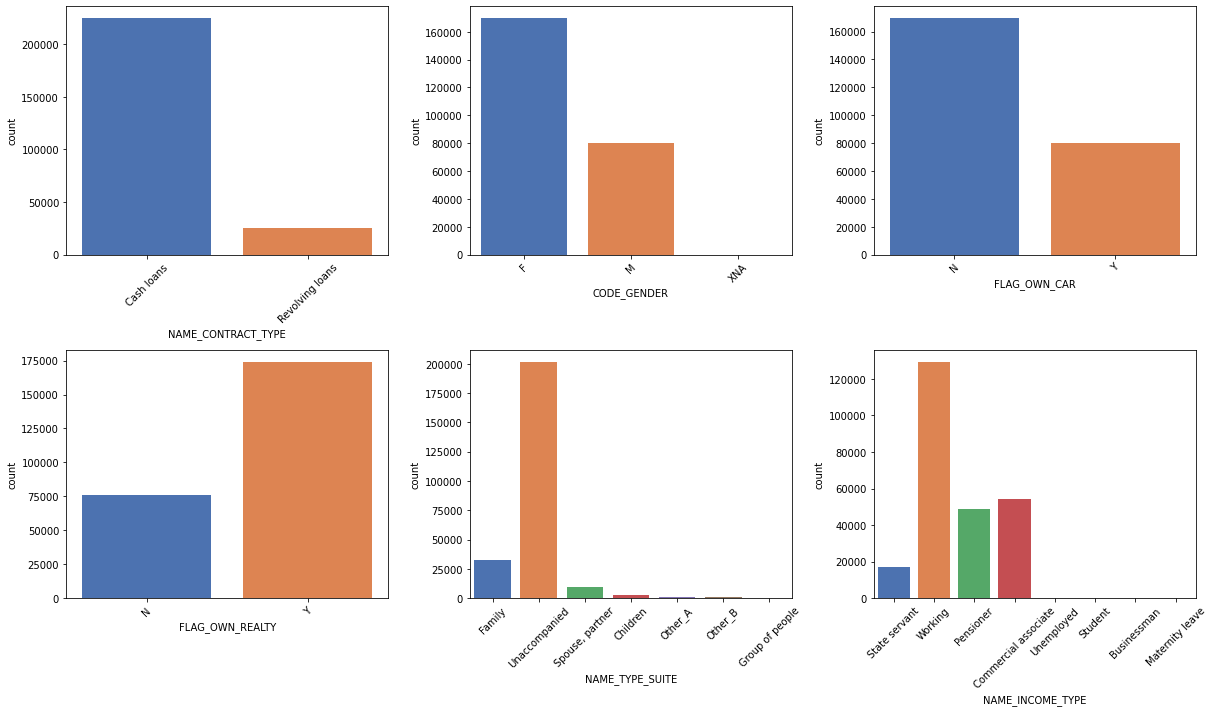

In [98]:
Columns=cat_col_list[0:6]
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T0[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()

**Observations:**
1. For the applicants who doesnt own a car there is a chance that they dont find difficulty in repaying the loan (It might be because there wont be expense on car)
2. For the applicants who own a real estate property there is a chance that they dont find difficulty in repaying the loan (It might be because they dont need to pay rent for living or get steady income on property)
3. Females who applied for the loan are having no difficulty in paying loan as compared to Male who are half in number.
4. People adopting for Cash Loans are finding it easy to repay loans(may be because its a one time commitment based on clients need).
5. Single and Working class seems to have less difficulty in repaying as their expenses might be less.   

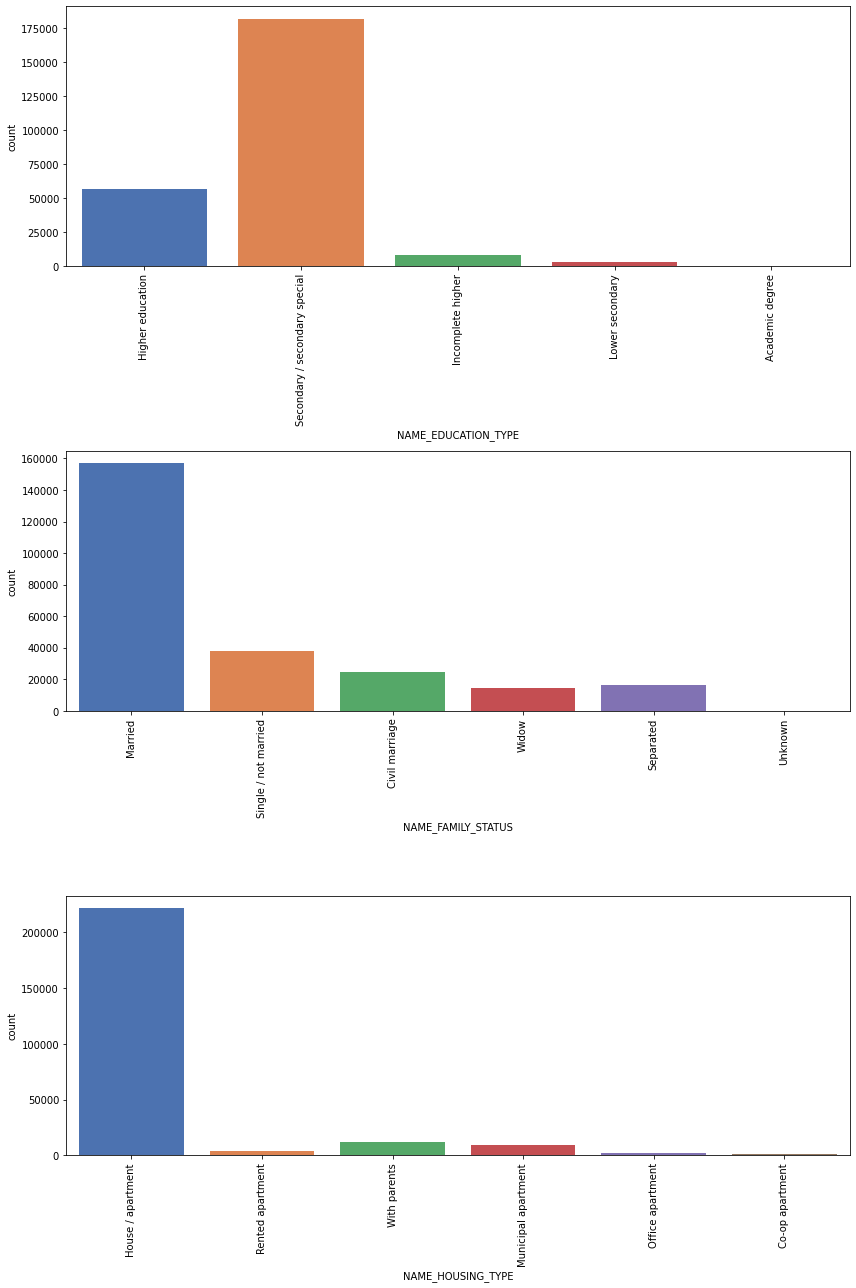

In [99]:
Columns=cat_col_list[6:9]
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T0[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

Observations:
1. Applicants with secondary education have less difficulty in paying.
2. Most of the applicants are Married that belongs to this category.
3. Applicants living in House/Apartment find less difficulty in repaying as expenses due to rent might be low.

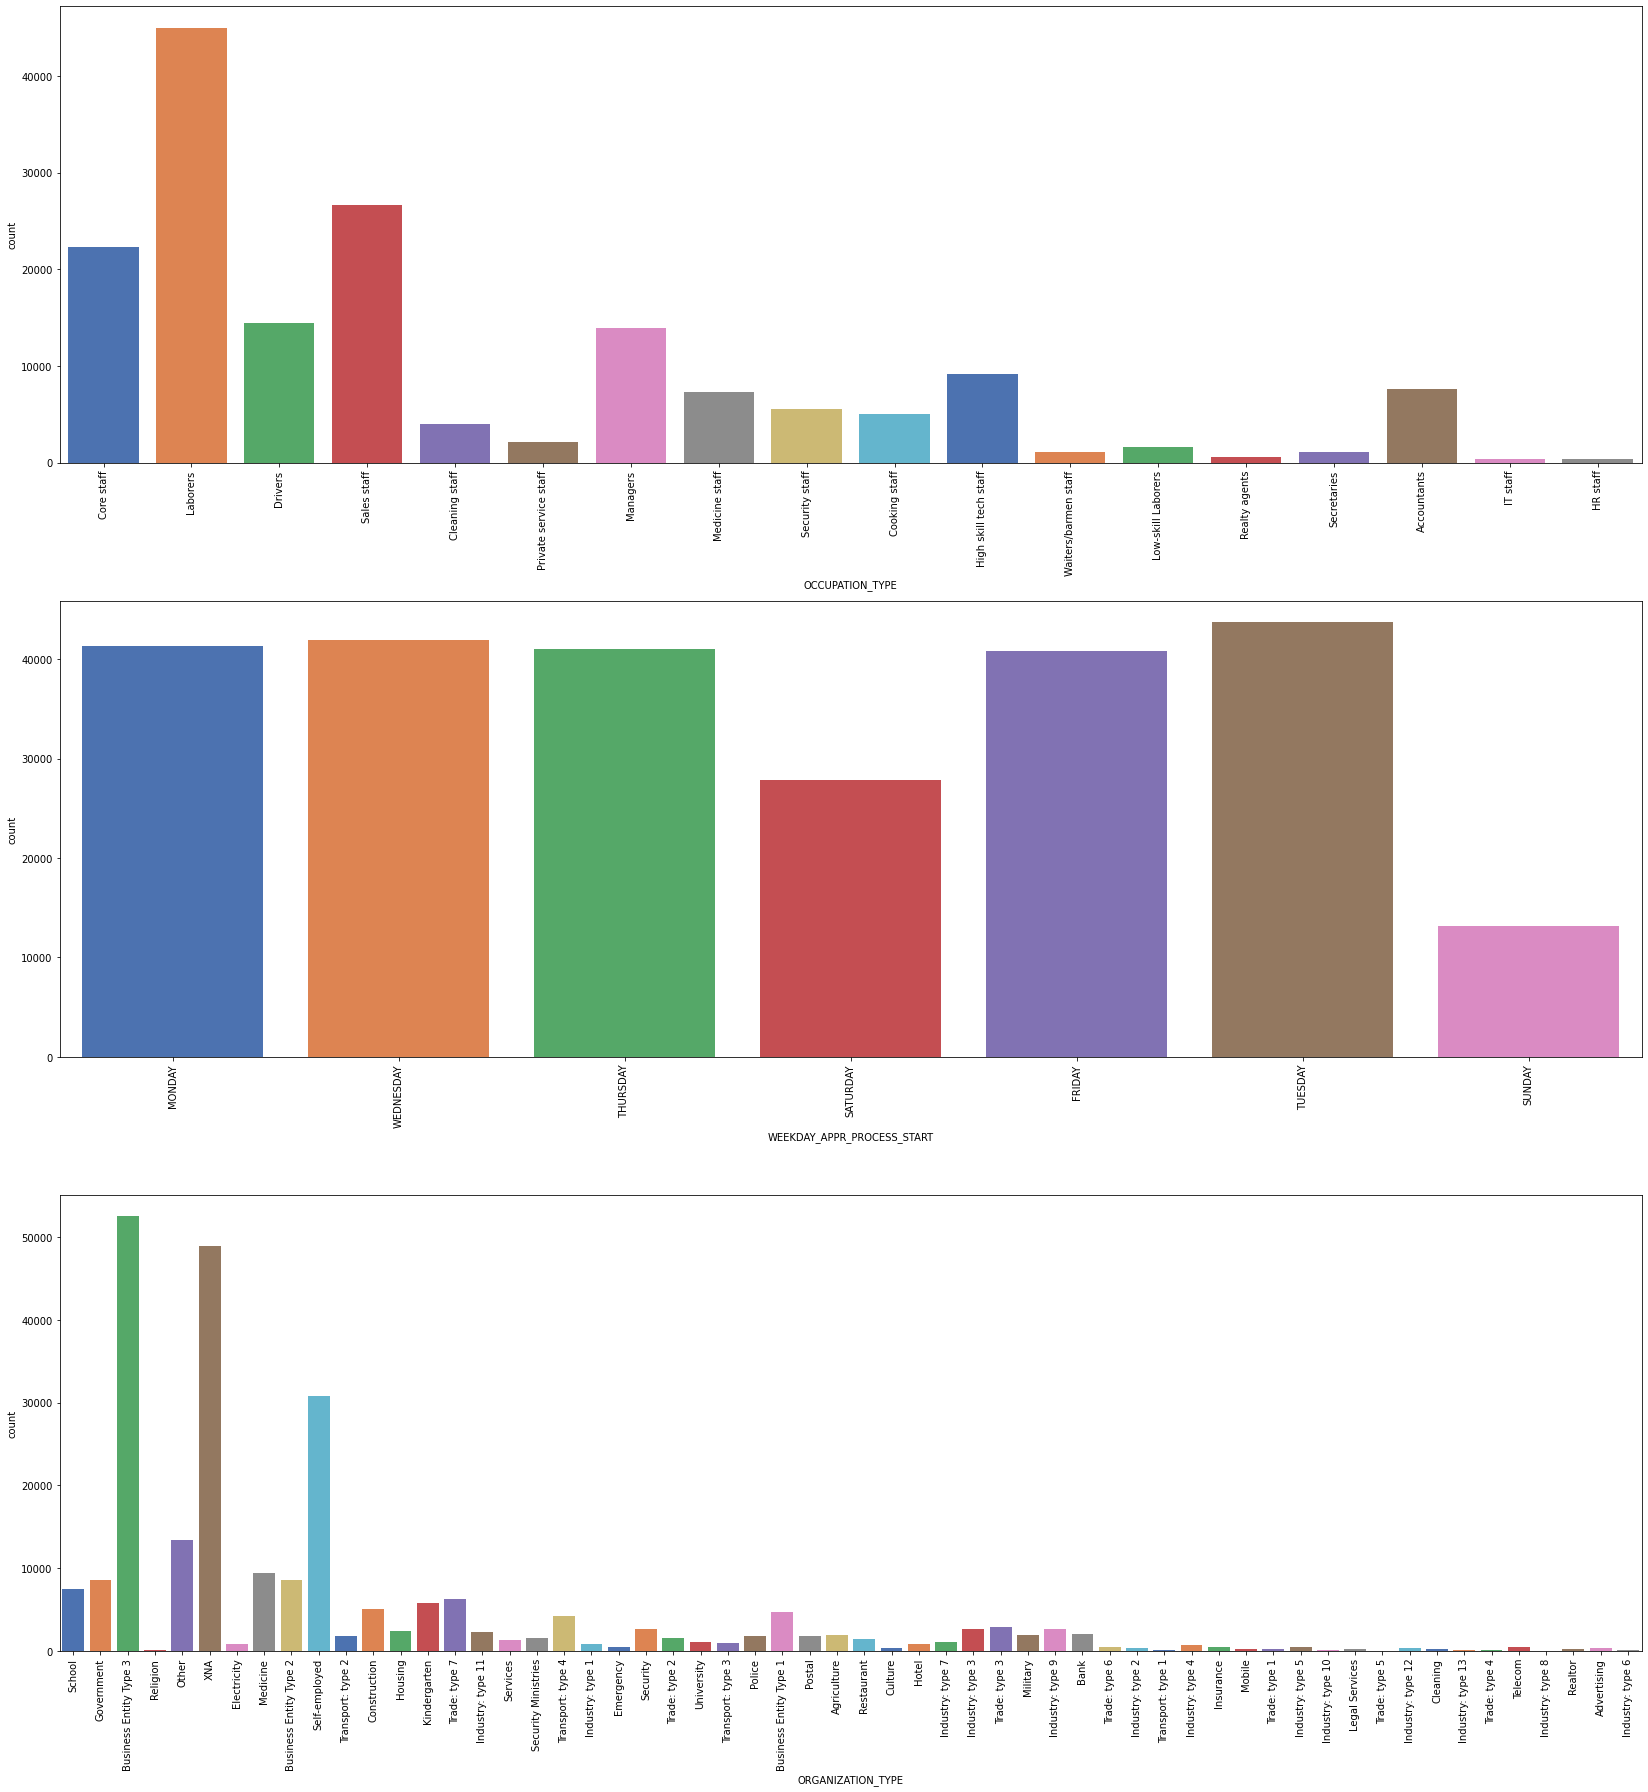

In [100]:
Columns=cat_col_list[9:12]
fig, ax = plt.subplots(3, 1, figsize=(23, 25))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T0[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

**Observations:**

1. Applicants belonging to Business Entity Type3/Self employed find less difficulty.

2. Applicants of this category fall majorly in Laborers category,sales staff is on next who fall into this category.

####Univariate Analysis-Categorical Variable-Target(1)

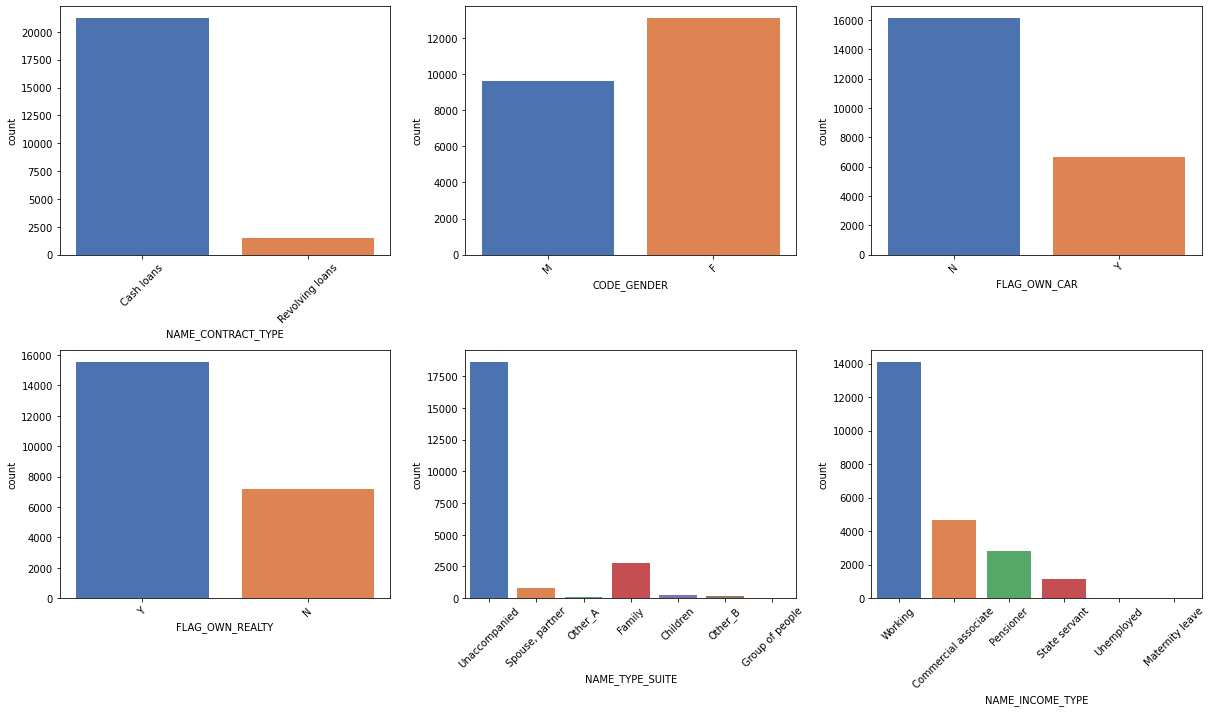

In [101]:
Columns=cat_col_list[0:6]
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T1[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()

**Observations:**

1. For the applicants who doesnt own a car there is a chance that they find difficulty in repaying the loan, this might be because they are not in a condition of affording even the car.

2. For the applicants who own a real estate property there is a chance that they find difficulty in repaying the loan.It might be deprecating assest class which needs more investment.

3. Here no of male are more as compared to target variable 0 but still females are more who will be having payment difficulty.

4. Working class has more difficulty in paying(might be they are in majority who have taken loan)

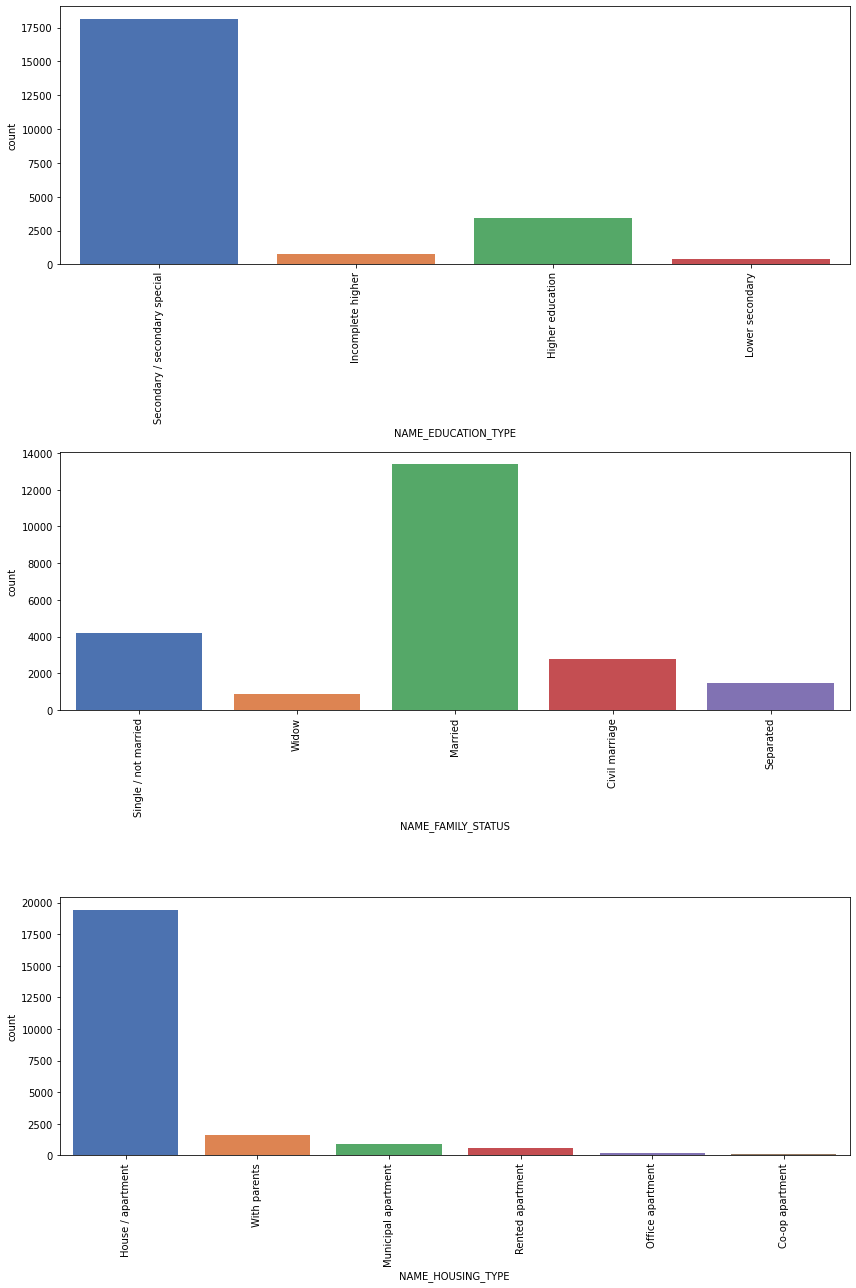

In [102]:
Columns=cat_col_list[6:9]
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T1[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

**Observations:**

1. We can understand for this category of applicants they are taking more cash loans, most of them are married and single, they are working professionals or commercial associates
2. Most of the applicants who are in this category are lower secondary and above educated and mostly living in a house / appartment
3. Most of the applicants who belong to this catgory are females and typically with a family size of two, and most of them dont have a child.

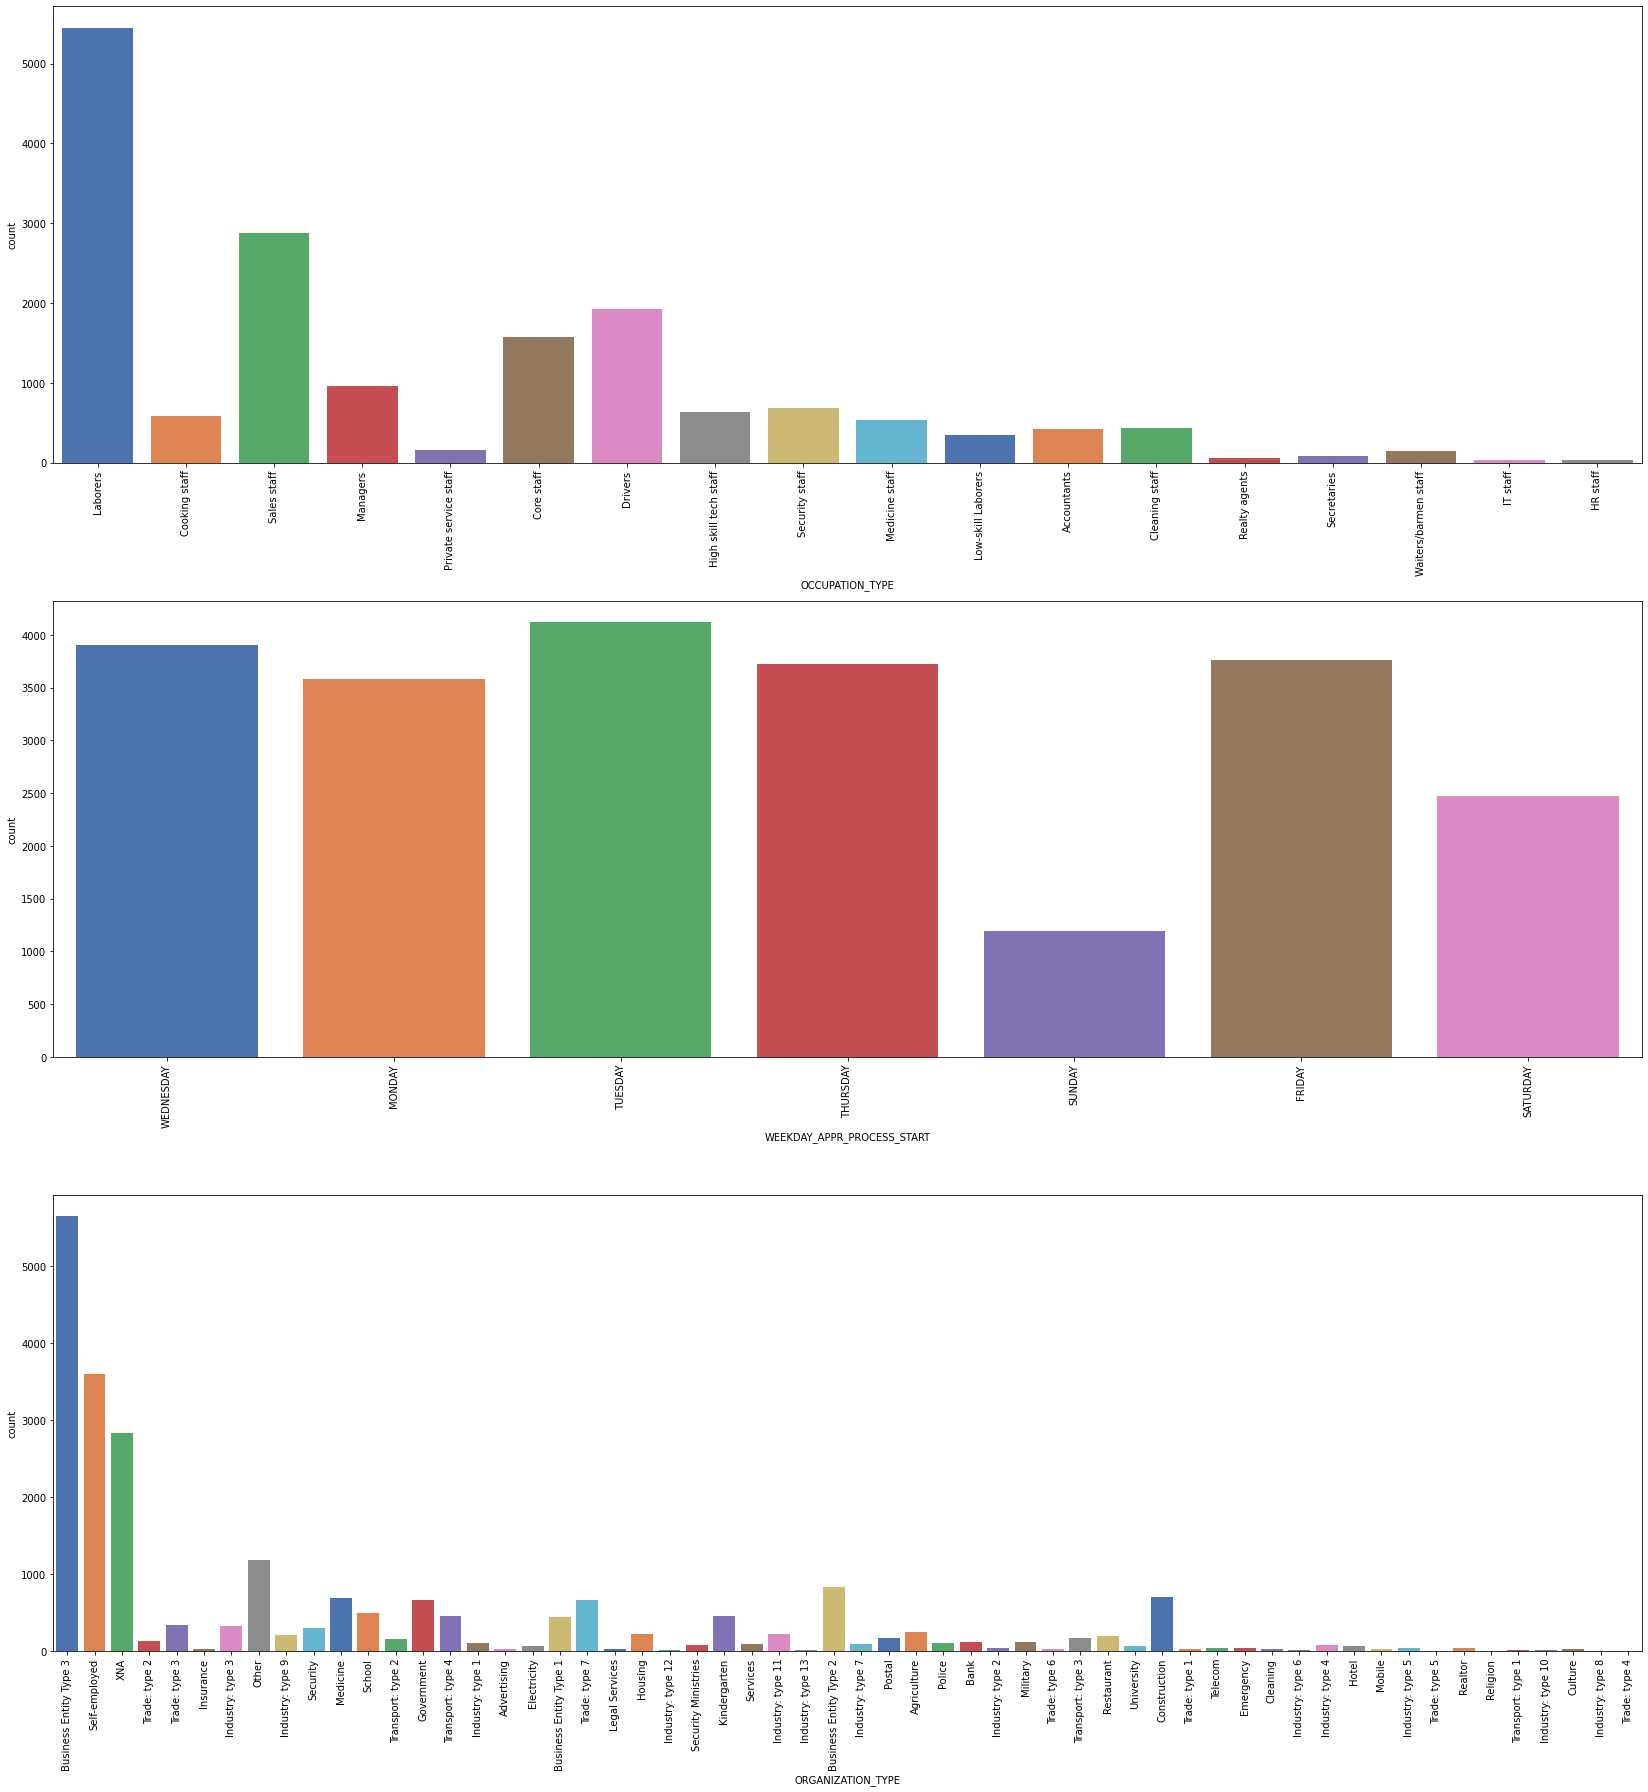

In [103]:
Columns=cat_col_list[9:12]
fig, ax = plt.subplots(3, 1, figsize=(23, 25))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(application_data_T1[var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

**Observations:**

1. Most of the applicants in this category reside in the type 2 and 3 regions.

2. Applicants in this category mostly fall under the occupation of laborers who work in Business Entity type 3 organizations/ self employed.

####Univariate Analysis-Continous Variable-Target(0)

In [104]:
print(list(application_data.select_dtypes(exclude='object')))

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_IN_YEAR', 'Loan_T0_Value', 'BIN_AMOUNT_INCOME_TOTAL', 'BIN_AGE_IN_YEAR']


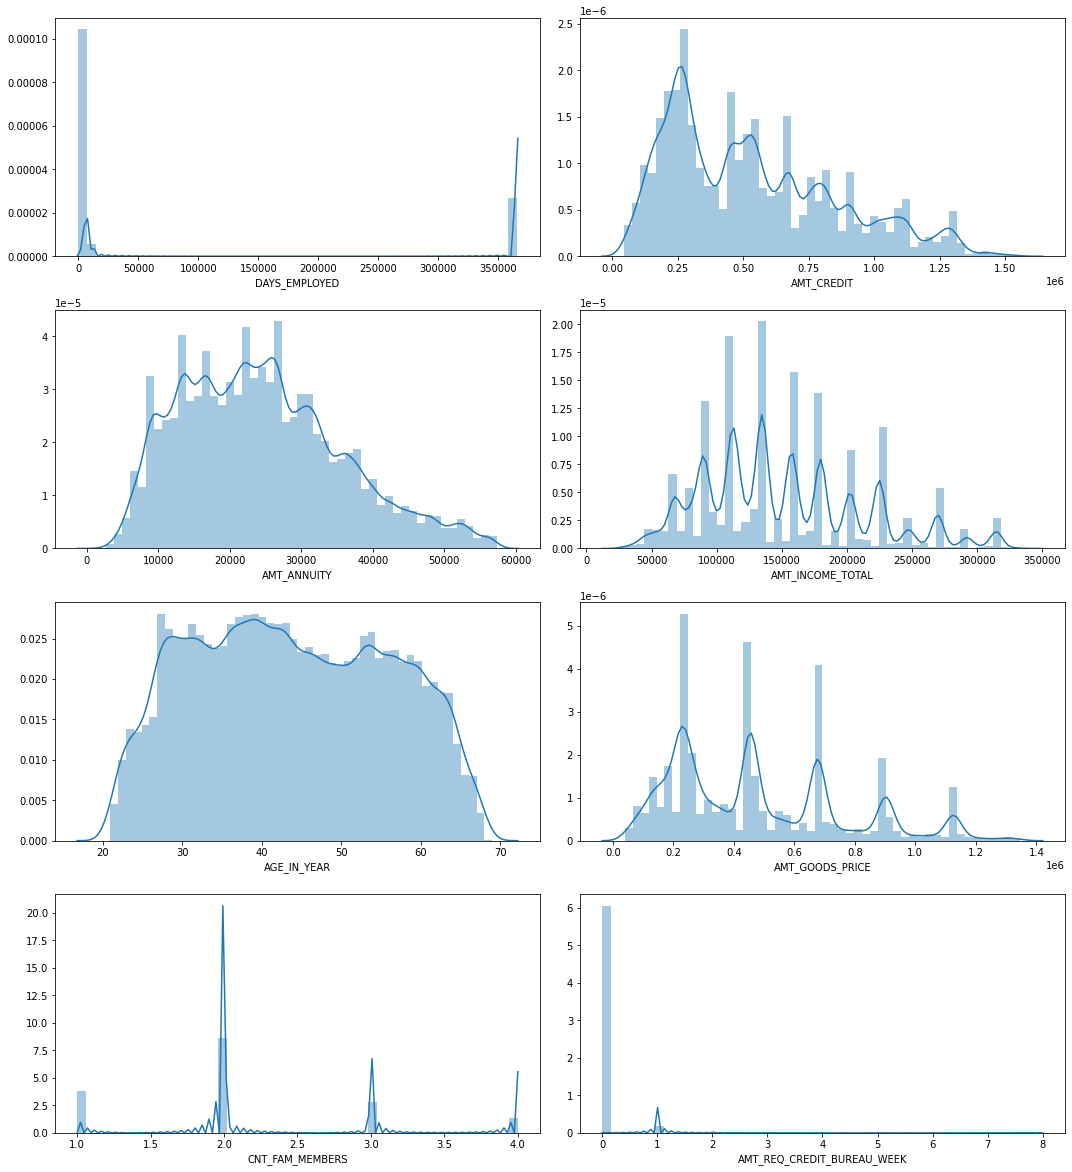

In [105]:
#Creatinga a column List on which Univariate Analysis would be performed.
Columns=['DAYS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AGE_IN_YEAR',
         'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_WEEK']

# Number of numerical columns
length=len(Columns)

# calculation for subplots
n=2
m=(length//n)+1
count=1

# Setting figure size
plt.figure(1,figsize=(15,20))

# Running in loop to plot all columns as subplot
for col in Columns:
    plt.subplot(m,n,count)
    data = abs(application_data_T0[col])
    sns.distplot(data.dropna(),hist=True)
    count+=1

# Show graphs
plt.tight_layout()
plt.show()      
        

**Observation:**

1. We can see that the most of the applicanta who are able to repay the loans are havign the credit somewhere between (100k to 750k) and annuity between 10k to 50k.
2. Most of the applicants are in the income range between 50K to 300K.
3. The Goods price for which they are taking the loan are in the range of 20K to 800K,depicting loan to value ratio is not very high.
4. Most of the applicants have family members around 2, depicting short family therefore easily able to repay loans

####Univariate Analysis-Continous Variable-Target(1)

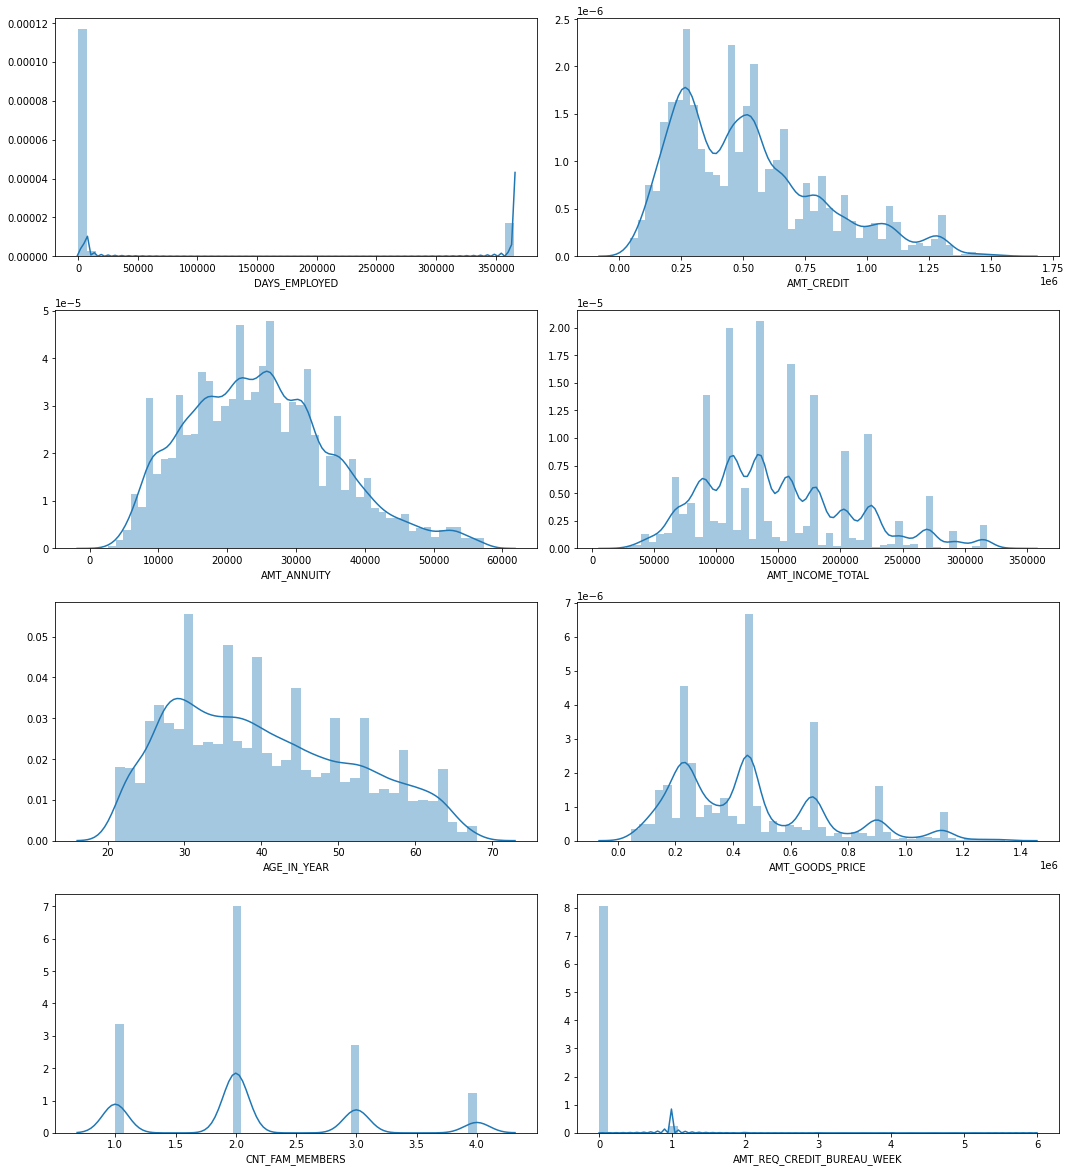

In [106]:
#Creatinga a column List on which Univariate Analysis would be performed.
Columns=['DAYS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AGE_IN_YEAR',
         'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_WEEK']

# Number of numerical columns
length=len(Columns)

# calculation for subplots
n=2
m=(length//n)+1
count=1

# Setting figure size
plt.figure(1,figsize=(15,20))

# Running in loop to plot all columns as subplot
for col in Columns:
    plt.subplot(m,n,count)
    data = abs(application_data_T1[col])
    sns.distplot(data.dropna(),hist=True)
    count+=1

# Show graphs
plt.tight_layout()
plt.show()      

**Observation:**

1. We can see that the most of the applicanta who are not able to repay the loans are having the credit somewhere around 250K and annuity 28k.
2. Most of the applicants are in the income range between 100K to 300K.
3. The Goods price for which they are taking the loan are in the range of 20K to 800k.
4. Most of the applicants have family members around 2, but few have 3 or 4 which is more as compared to the ones who does not have difficulty in paying.

### Bivariate Analysis

#### Continous-Categorical Variable

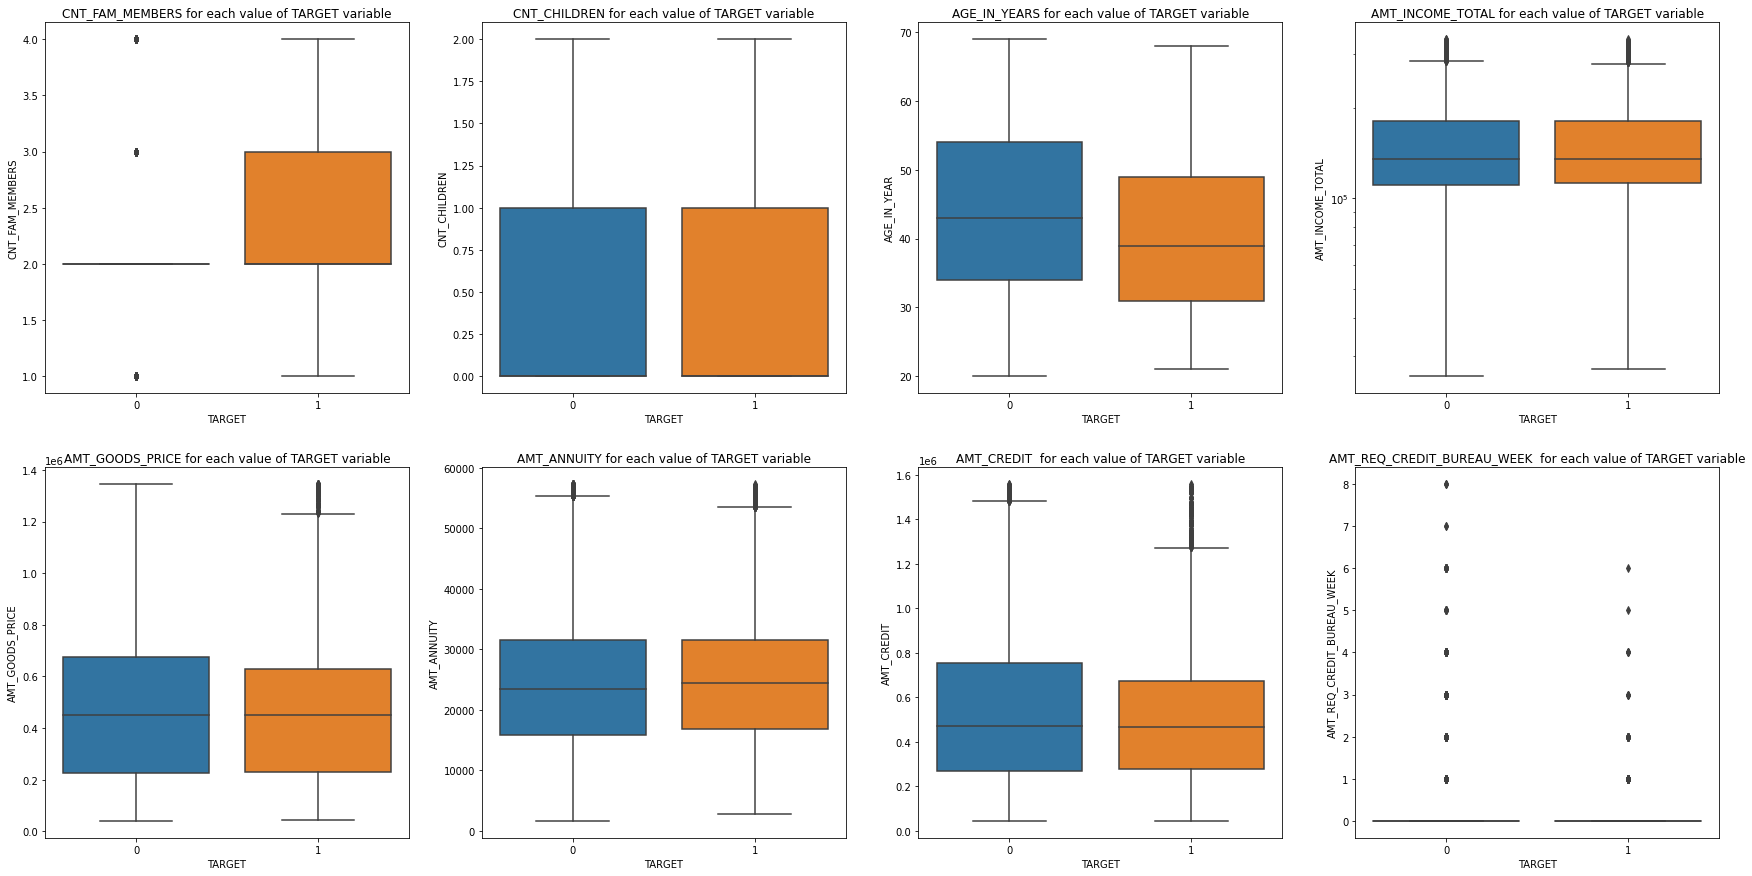

In [107]:
# Since the pattern of Univarite Analysis seems to be bit similar, therefore we are performing Bivariate Analysis, to gain some more insights from the data.

# Continous-Categorical

fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(30,15))

#Analyze impact of No. of Family Members on Target Variable 
sns.boxplot(x="TARGET", y="CNT_FAM_MEMBERS", data= application_data, ax=axes[0][0])
axes[0][0].set_title('CNT_FAM_MEMBERS for each value of TARGET variable')

#Analyze impact of No. of Children on Target Variable
sns.boxplot(x="TARGET", y="CNT_CHILDREN", data= application_data, ax=axes[0][1])
axes[0][1].set_title('CNT_CHILDREN for each value of TARGET variable')

#Analyze impact of Age of applicants on Target Variable
c = sns.boxplot(x="TARGET", y="AGE_IN_YEAR", data= application_data, ax=axes[0][2])
axes[0][2].set_title('AGE_IN_YEARS for each value of TARGET variable')

#Analyze impact of Total Income on Target Variable
Ti = sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=application_data, ax=axes[0][3])
Ti.set(yscale ="log")
axes[0][3].set_title('AMT_INCOME_TOTAL for each value of TARGET variable')

#Analyze impact of AMT GOODS PRICE on Target Variable
sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data=application_data, ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE for each value of TARGET variable')

#Analyze impact of ANNUITY AMT on Target Variable
sns.boxplot(x="TARGET", y="AMT_ANNUITY", data=application_data, ax=axes[1][1])
axes[1][1].set_title('AMT_ANNUITY for each value of TARGET variable')

#Analyze impact of CREDIT AMT on Target Variable
sns.boxplot(x="TARGET", y="AMT_CREDIT", data=application_data, ax=axes[1][2])
axes[1][2].set_title('AMT_CREDIT  for each value of TARGET variable')

#Analyze impact of AMT_REQ_CREDIT_BUREAU_WEEK on Target Variable
CBW= sns.boxplot(x="TARGET", y="AMT_REQ_CREDIT_BUREAU_WEEK", data=application_data, ax=axes[1][3])
axes[1][3].set_title('AMT_REQ_CREDIT_BUREAU_WEEK  for each value of TARGET variable')

plt.show() 

**Observations:**

1. There is no major difference between the behaviour of Target 1 and 0 for the Count of family members affecting the loan repayment
2. There is no major difference between the behaviour of Target 1 and 0 for the Count of Children affecting the loan repayment,  but we can see that in the case of the loan defaulters we can see that most of them are without children
3. If we see the hist plot(below) between the target and the age in years we can infer that the applicants around age of 30 are more prone to default lone.
4. As per the AMT_Income_Total for each value of Target variable in graph we can see that the median income of the applicant is less for the applicants who are prone to default the loan.
5. If we see the above graph and below dist plot we can see that in every segment of the goods prioce we have people repaying the loan is more than the people finding difficulty in repaying the loan.
6. With respect to the annuity we can observe that from the below distribution plot most of the applicants are having some annuity between 0-50000. and in that bracket we can see that there is more possiblity for the people finding difficulty in repaying the loan.
7. For the Amount credit, we can understand that majority of the applicants fall under the 100000 below and in this its observed that the applicants face difficulty in repaying the loans if their credit is nearer to 100000 
8. If we see the dist plot for the number of queries being sent to the credit bearau, we can see that whenever there are more queries, we have seen that the applicants have more difficulty in repaying the loan.

#### Categorical-Categorical

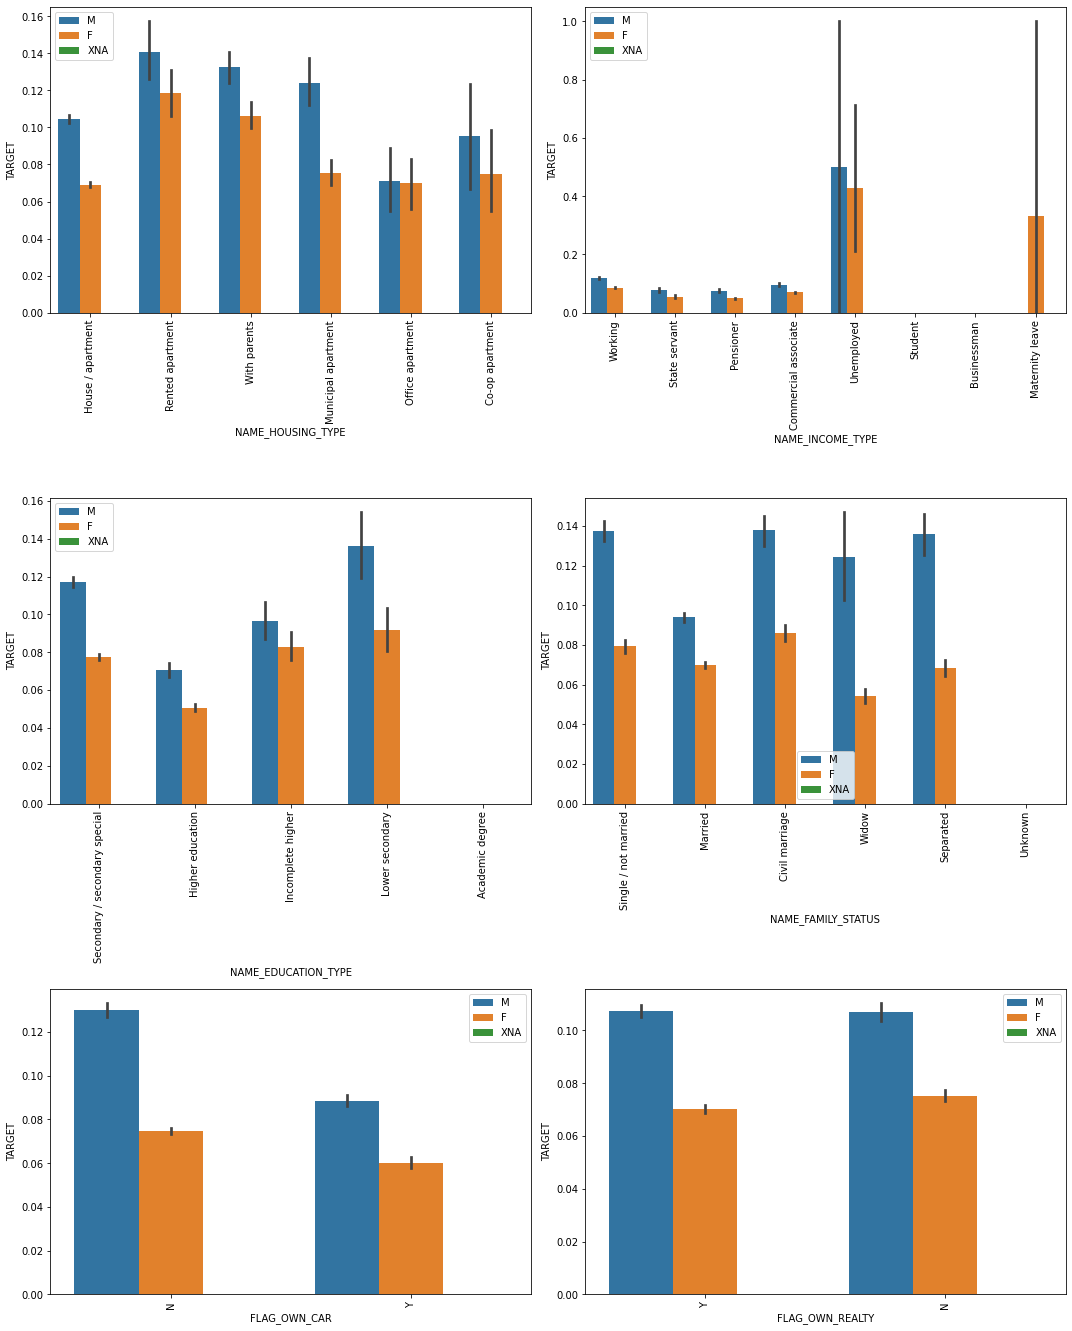

In [108]:
# Categorical-Categorical

# Analyze impact of Gender and few other categorical variables on "Target" variable

#Selecting few columns for identification of Outliers
impact_list=['NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','FLAG_OWN_CAR','FLAG_OWN_REALTY']

# Number of columns
size=len(impact_list)

# calculation for subplots
n=2
m=(size//n)+1
count=1

# Setting figure size
plt.figure(1,figsize=(15,25))

# Running in loop to plot all columns as subplot
for column in impact_list:
    plt.subplot(m,n,count)
    sns.barplot(x=column,y="TARGET",hue='CODE_GENDER',data=application_data)
    plt.legend(loc="best")
    plt.xticks(rotation=90)
    count+=1

# Show graphs
plt.tight_layout()
plt.show()

**Observations:**

1. Across Genders applicants living in Rented Apartments / with parents have more difficulty on repaying loan.
2. Across Genders applicants who are Unemployed/on maternity leave are more on default.
3. Applicants who are widow and Highly educated have less difficulty in repaying.Clients who are separated or with civil marriage with qualification as lower secondary have more difficulty in repayment.
4. Across gender applicants owning a car are less likely to default.
5. Owning a Realty does not appear to influence default across gender.

#### Correlation Analysis(Continous-Continous Variable)

In [0]:
# Converting datatype of few variables to object type as they are not required in finding out correlation as it is performed on continous variable rather than categorical. 

application_data_T0.TARGET = application_data_T0.TARGET.astype(object)
application_data_T1.TARGET = application_data_T1.TARGET.astype(object)
application_data_T0.SK_ID_CURR = application_data_T0.SK_ID_CURR.astype(object)
application_data_T1.SK_ID_CURR = application_data_T1.SK_ID_CURR.astype(object)

application_data_T0.FLAG_OWN_CAR  = application_data_T0.FLAG_OWN_CAR .astype(object)
application_data_T1.FLAG_OWN_CAR  = application_data_T1.FLAG_OWN_CAR .astype(object)
application_data_T0.FLAG_OWN_REALTY = application_data_T0.FLAG_OWN_REALTY.astype(object)
application_data_T1.FLAG_OWN_REALTY = application_data_T1.FLAG_OWN_REALTY.astype(object)

application_data_T0.FLAG_MOBIL  = application_data_T0.FLAG_MOBIL .astype(object)
application_data_T1.FLAG_MOBIL  = application_data_T1.FLAG_MOBIL .astype(object)
application_data_T0.FLAG_EMP_PHONE = application_data_T0.FLAG_EMP_PHONE.astype(object)
application_data_T1.FLAG_EMP_PHONE = application_data_T1.FLAG_EMP_PHONE.astype(object)

application_data_T0.FLAG_CONT_MOBILE  = application_data_T0.FLAG_CONT_MOBILE .astype(object)
application_data_T1.FLAG_CONT_MOBILE  = application_data_T1.FLAG_CONT_MOBILE .astype(object)
application_data_T0.FLAG_EMAIL  = application_data_T0.FLAG_EMAIL .astype(object)
application_data_T1.FLAG_EMAIL  = application_data_T1.FLAG_EMAIL .astype(object)

In [110]:
application_data_T0.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_CONT_MOBILE                 object
FLAG_EMAIL                       object


Text(0.5, 1.0, 'Correlation for Target-0(All Other Cases)')

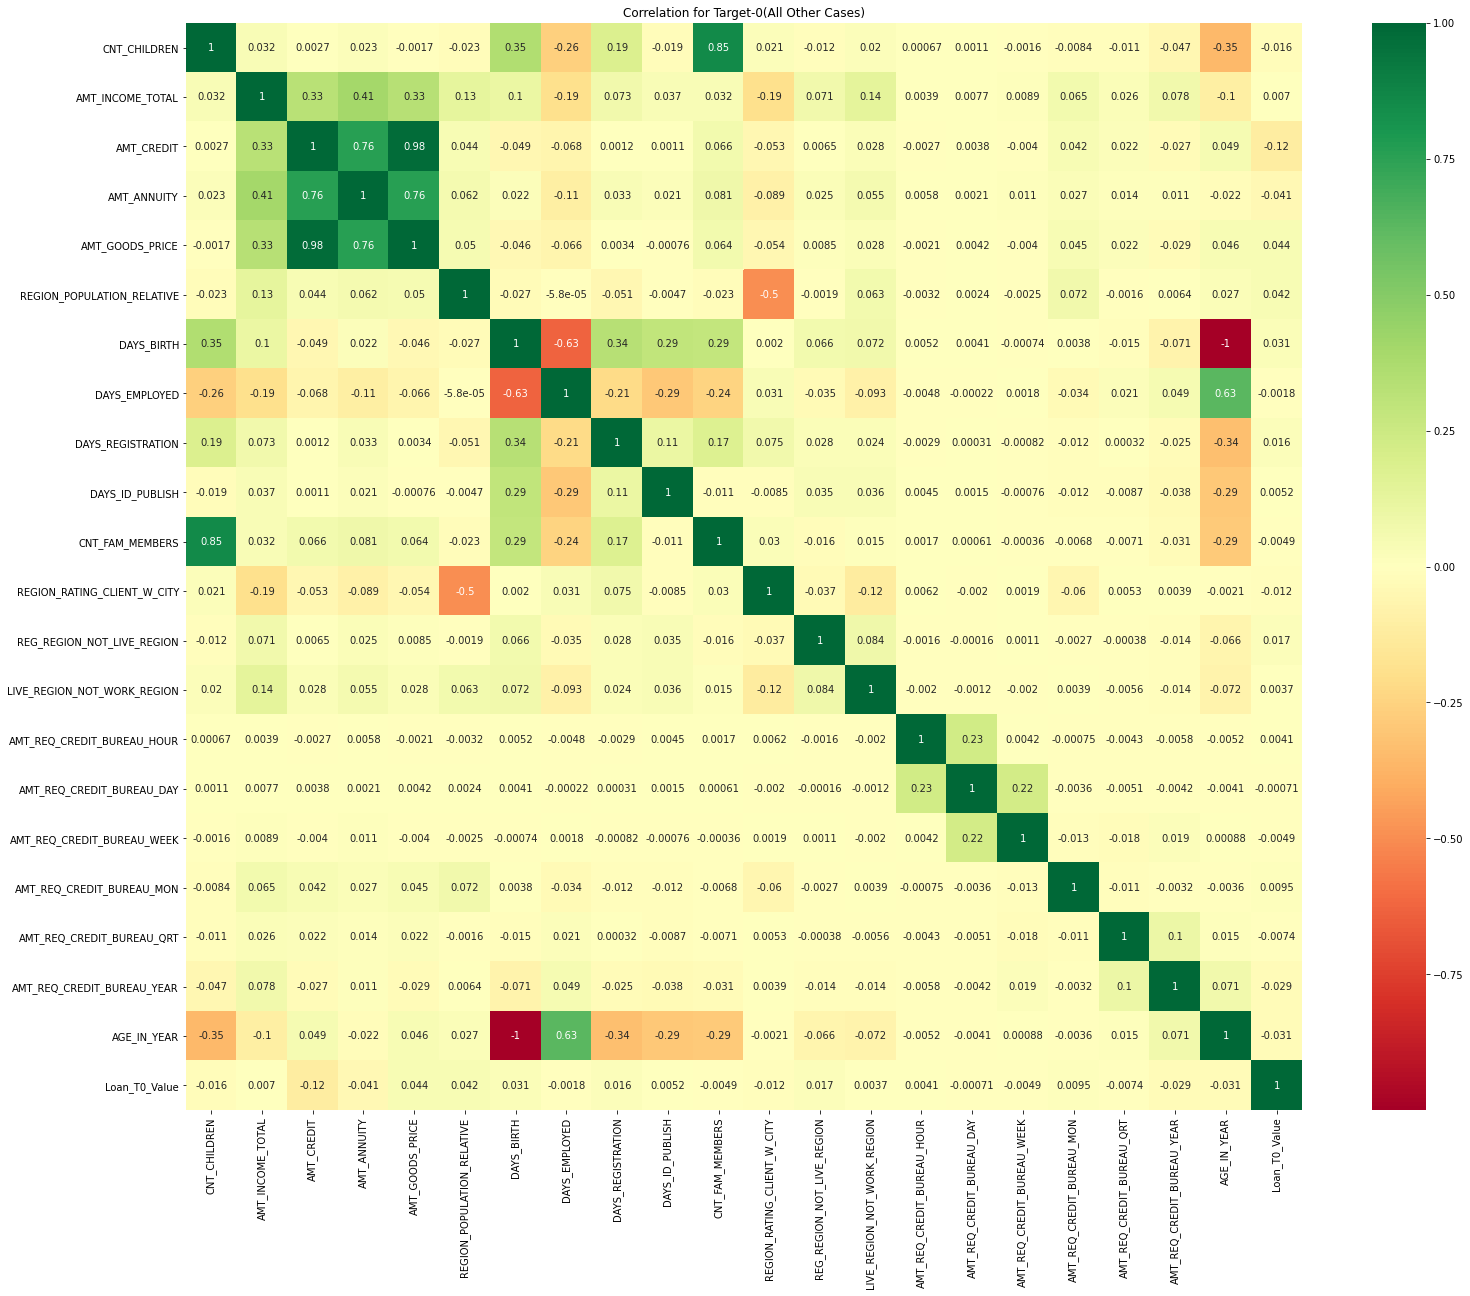

In [111]:
# Heatmap to explore the correlation of target value-0 with respect to other variables in dataframe

corr = application_data_T0.corr('pearson')
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation for Target-0(All Other Cases)")

In [112]:
#Finding the correlation between variables in Application_Data_T0(All Other Cases)

corr_matrix = application_data_T0.corr()
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']

corr.dropna(subset = ['CORR'], inplace = True)
c=corr.sort_values('CORR', ascending = False)
c

,VAR1,VAR2,CORR
446,AGE_IN_YEAR,DAYS_BIRTH,0.999721
90,AMT_GOODS_PRICE,AMT_CREDIT,0.982272
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.853009
68,AMT_ANNUITY,AMT_CREDIT,0.763052
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.762681
160,DAYS_EMPLOYED,DAYS_BIRTH,0.630454
447,AGE_IN_YEAR,DAYS_EMPLOYED,0.630369
247,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.497605
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.405172
132,DAYS_BIRTH,CNT_CHILDREN,0.352569


In [113]:
#Top 10 highly Correlated Variables in Application_Data_T0 (All Other Cases)
c.head(10)

,VAR1,VAR2,CORR
446,AGE_IN_YEAR,DAYS_BIRTH,0.999721
90,AMT_GOODS_PRICE,AMT_CREDIT,0.982272
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.853009
68,AMT_ANNUITY,AMT_CREDIT,0.763052
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.762681
160,DAYS_EMPLOYED,DAYS_BIRTH,0.630454
447,AGE_IN_YEAR,DAYS_EMPLOYED,0.630369
247,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.497605
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.405172
132,DAYS_BIRTH,CNT_CHILDREN,0.352569


**Observation:**

1. Higher the Good Price for the loans the applicants are applying, higher is the credit they are in.
2. In the same way higher is the goods price the applicants are applying we have seen they are having high annuity.
3. Higher their Income higher is their annuity and goods price and Credit they possess.

In [114]:
application_data_T1.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_CONT_MOBILE                 object
FLAG_EMAIL                       object


Text(0.5, 1.0, 'Correlation for Target-1(Clients with difficulty in payment)')

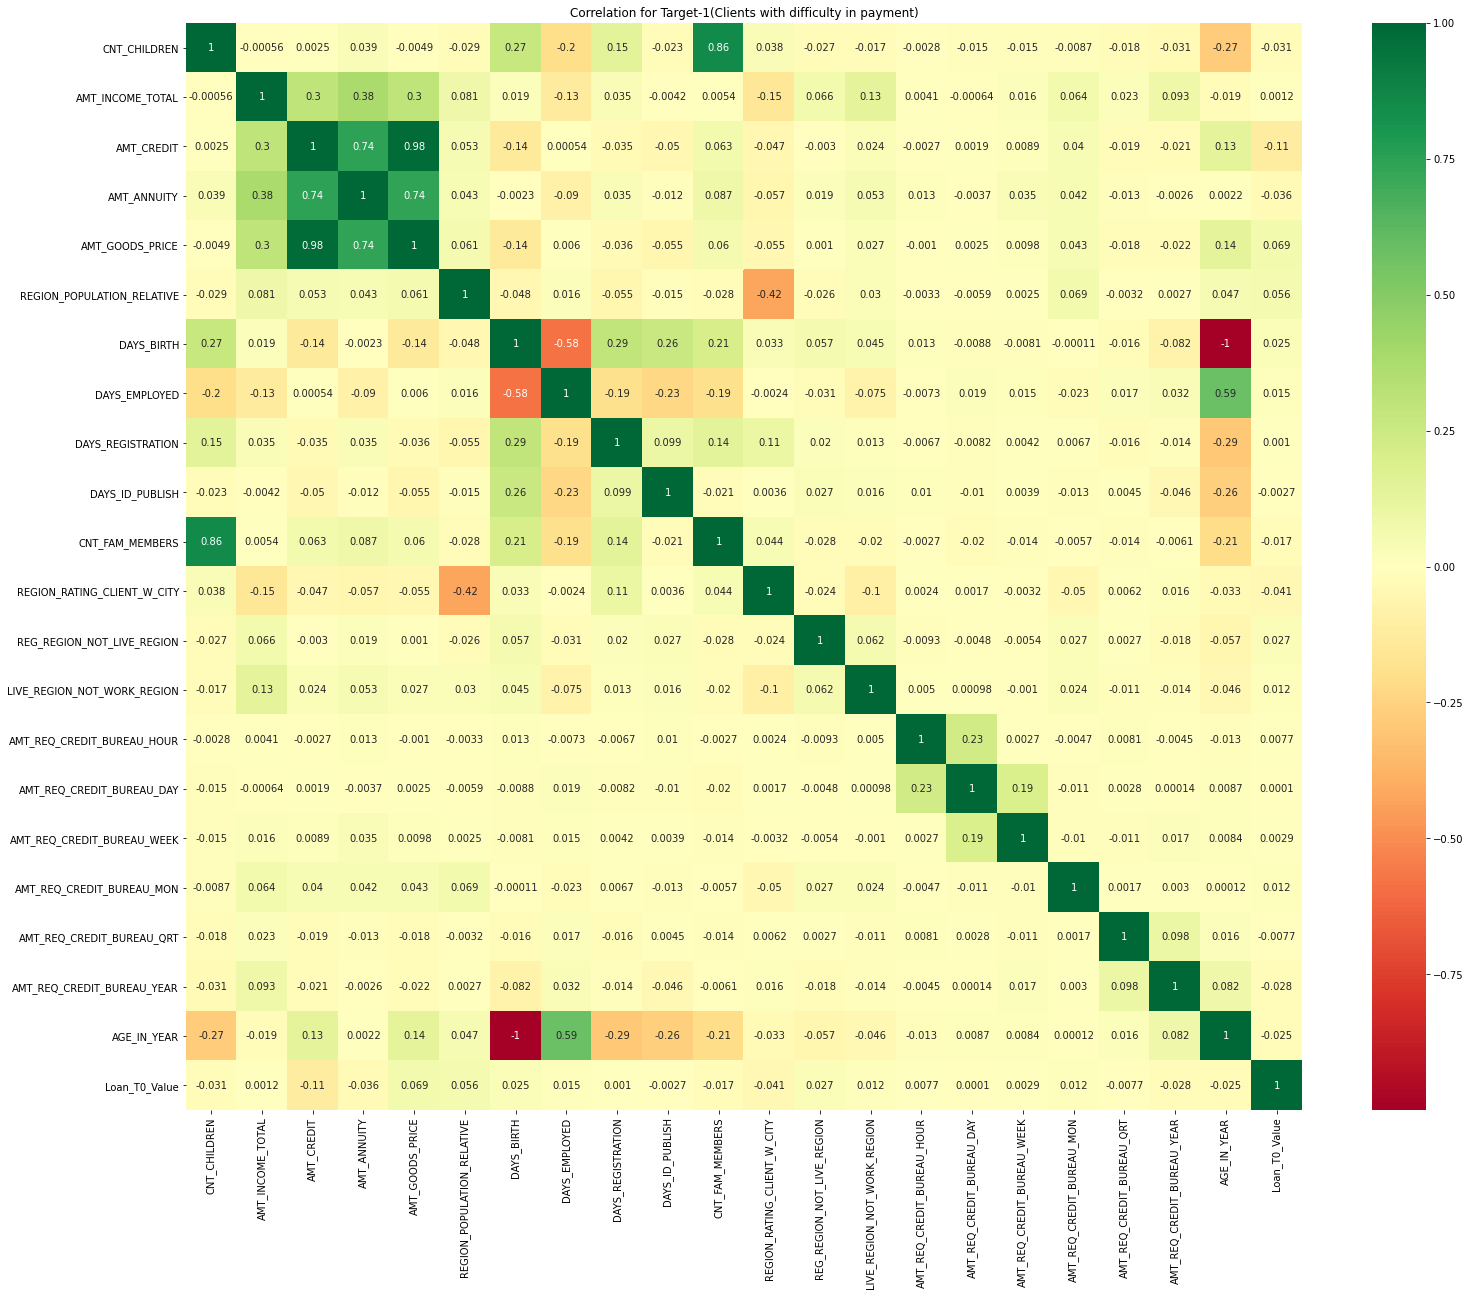

In [115]:
# Heatmap to explore the correlation of target value-1 with respect to other variables in dataframe

corr = application_data_T1.corr('pearson')
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation for Target-1(Clients with difficulty in payment)")

In [116]:
#Finding the correlation between variables in Application_Data_T1(Clients With Payment Difficulty)

corr_matrix = application_data_T1.corr()
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']

corr.dropna(subset = ['CORR'], inplace = True)
c=corr.sort_values('CORR', ascending = False)
c

,VAR1,VAR2,CORR
446,AGE_IN_YEAR,DAYS_BIRTH,0.999697
90,AMT_GOODS_PRICE,AMT_CREDIT,0.978369
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.857870
68,AMT_ANNUITY,AMT_CREDIT,0.743563
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.740960
447,AGE_IN_YEAR,DAYS_EMPLOYED,0.585076
160,DAYS_EMPLOYED,DAYS_BIRTH,0.584750
247,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.424491
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.380566
45,AMT_CREDIT,AMT_INCOME_TOTAL,0.301808


In [117]:
#Top 10 highly Correlated Variables in Application_Data_T1 (Clients With difficulty in Payment)
c.head(10)

,VAR1,VAR2,CORR
446,AGE_IN_YEAR,DAYS_BIRTH,0.999697
90,AMT_GOODS_PRICE,AMT_CREDIT,0.978369
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.857870
68,AMT_ANNUITY,AMT_CREDIT,0.743563
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.740960
447,AGE_IN_YEAR,DAYS_EMPLOYED,0.585076
160,DAYS_EMPLOYED,DAYS_BIRTH,0.584750
247,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.424491
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.380566
45,AMT_CREDIT,AMT_INCOME_TOTAL,0.301808


**Observation:**
1. Higher the Goods price they are also having the high Credit and Annuity.
2. Higher the Annuity they have higher Credit.
3. If we see here the correlation between the Income and Loan is not high that means people with relatively low income are also taking more loans.
4. Set of Correlation Columns in both the sets i.e. For Target Variable 0 and Target Variable 1 seems to be fairly same. 

### Merged Dataframe

In [118]:
app_prv_merge=pd.merge(application_data,previous_application,how='left',on='SK_ID_CURR',suffixes=('_app','_prv'))
print(app_prv_merge.shape)

(1271322, 77)


In [119]:
app_prv_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_app,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_app,AMT_ANNUITY_app,AMT_GOODS_PRICE_app,NAME_TYPE_SUITE_app,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_app,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEAR,Loan_T0_Value,BIN_AMOUNT_INCOME_TOTAL,BIN_AGE_IN_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_prv,AMT_ANNUITY_prv,AMT_APPLICATION,AMT_CREDIT_prv,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prv,WEEKDAY_APPR_PROCESS_START_prv,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_prv,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,pr_Loan_To_Value
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,1,0,Laborers,1.0,2,WEDNESDAY,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25,0.86,100000-250000,20-30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.00
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,1,0,Core staff,2.0,1,MONDAY,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,0.87,250000-500000,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.87
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,1,0,Core staff,2.0,1,MONDAY,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,0.87,250000-500000,40-50,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,0.97
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,1,0,Core staff,2.0,1,MONDAY,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,0.87,250000-500000,40-50,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,1.01
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,Laborers,1.0,2,MONDAY,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52,1.00,50000-100000,50-60,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRI

In [120]:
app_prv_merge.dtypes

SK_ID_CURR                           int64
TARGET                               int64
NAME_CONTRACT_TYPE_app              object
CODE_GENDER                         object
FLAG_OWN_CAR                        object
FLAG_OWN_REALTY                     object
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT_app                     float64
AMT_ANNUITY_app                    float64
AMT_GOODS_PRICE_app                float64
NAME_TYPE_SUITE_app                 object
NAME_INCOME_TYPE                    object
NAME_EDUCATION_TYPE                 object
NAME_FAMILY_STATUS                  object
NAME_HOUSING_TYPE                   object
REGION_POPULATION_RELATIVE         float64
DAYS_BIRTH                           int64
DAYS_EMPLOYED                        int64
DAYS_REGISTRATION                    int64
DAYS_ID_PUBLISH                      int64
FLAG_MOBIL                           int64
FLAG_EMP_PHONE                       int64
FLAG_CONT_M

length:  8


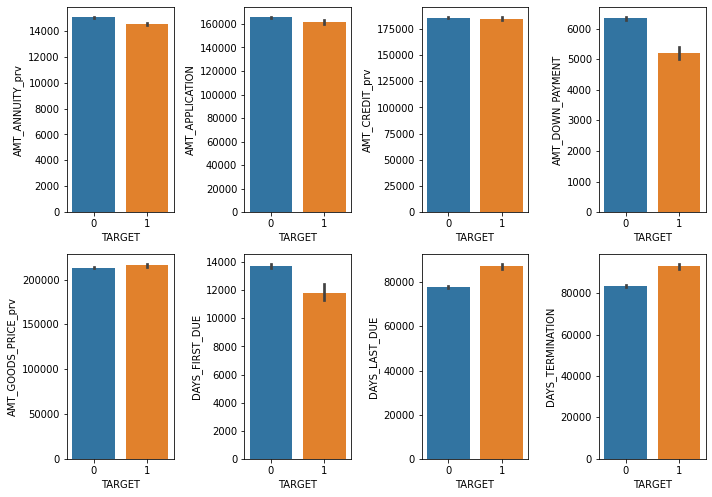

In [121]:
# Univariate Analysis for the merged dataframe

# Analyze impact of target on quantitative variables.

# Selecting only limited columns for univariate from merged dataframe

col_uni = ["AMT_ANNUITY_prv", "AMT_APPLICATION","AMT_CREDIT_prv", "AMT_DOWN_PAYMENT","AMT_GOODS_PRICE_prv",
               "DAYS_FIRST_DUE", "DAYS_LAST_DUE", "DAYS_TERMINATION"]


# Number of columns
ln=len(col_uni)
print("length: ",ln)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(5,figsize=(10,10))

# Running in loop to plot all columns as subplot
for column in col_uni:
    plt.subplot(m,n,ct)
    sns.barplot(y=column,x="TARGET",data=app_prv_merge)
    ct+=1

plt.tight_layout()
plt.show()

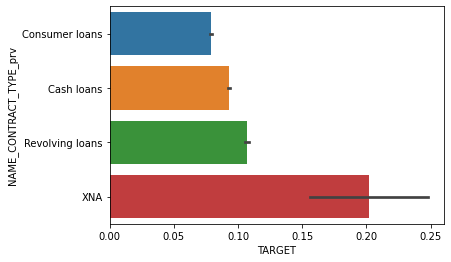

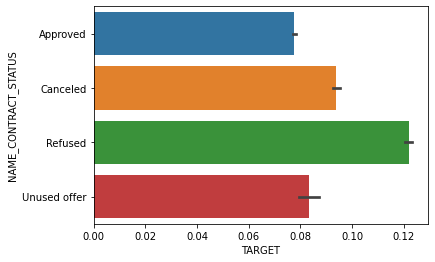

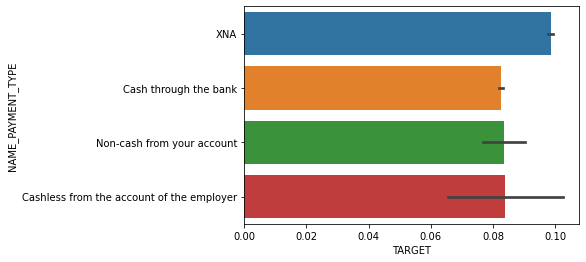

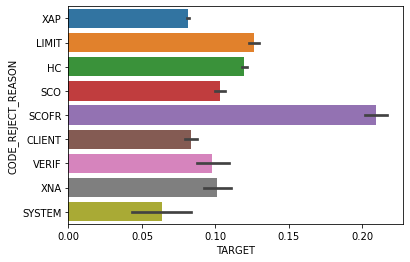

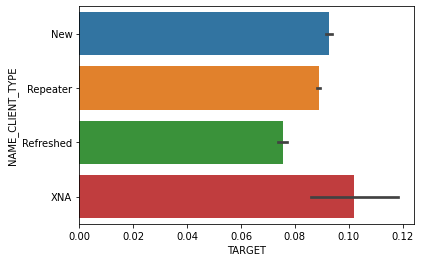

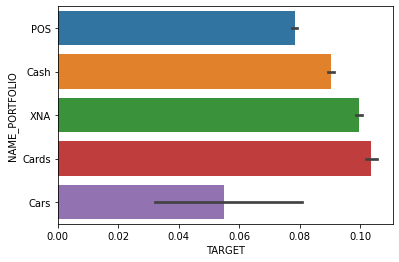

In [122]:
# Analyze impact of target on other categorical variables.

# Selecting only limited columns for univariate from merged dataframe

col_uni2 = ["NAME_CONTRACT_TYPE_prv", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","CODE_REJECT_REASON", "NAME_CLIENT_TYPE","NAME_PORTFOLIO"]

# Running in loop to plot all columns
for column in col_uni2:
    sns.barplot(y=column,x="TARGET",data=app_prv_merge)
    plt.show()

**Observation:**

1. Longer the duration gap of last due date of previous application higher the chances of default.
2. The applicants with more difficulty in payment had their previous application 'refused' whereas group with least difficulty had their previous application 'approved'.
3. The applicants who have no previous record or applying for the first time had more chances of default.

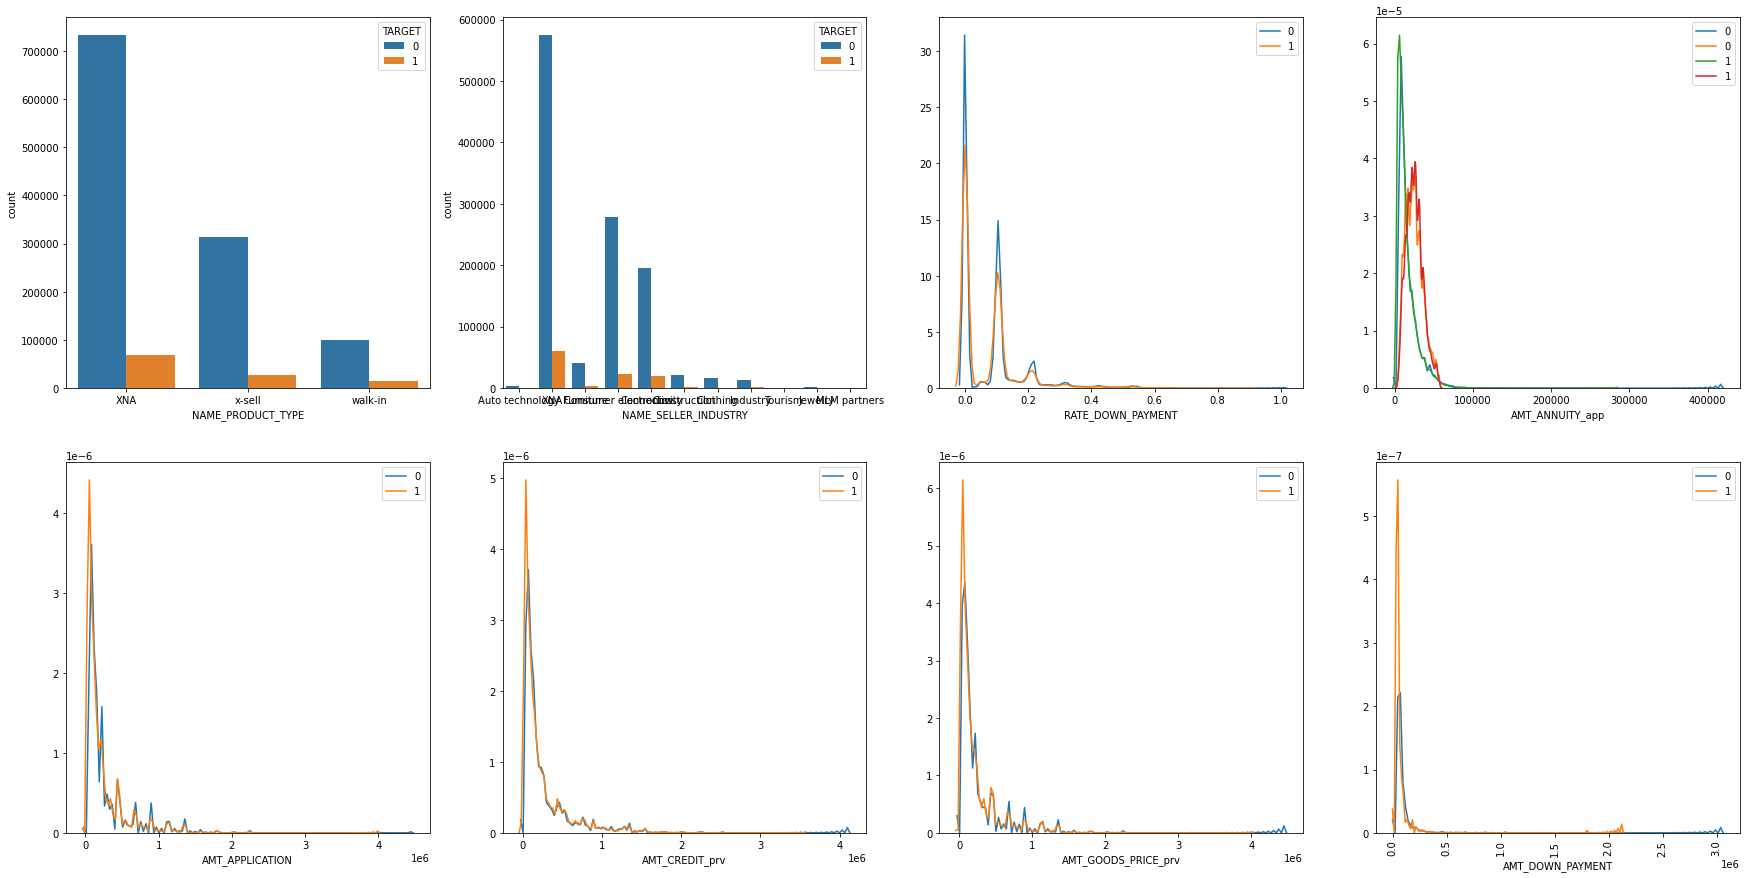

In [123]:
#Bivariate Analysis for the merged dataframes


fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(30,15))
sns.countplot(x = 'NAME_PRODUCT_TYPE', hue = 'TARGET', data = app_prv_merge,  ax=axes[0][0])
plt.xticks(rotation = 45)

sns.countplot(x = 'NAME_SELLER_INDUSTRY', hue = 'TARGET', data = app_prv_merge,  ax=axes[0][1])
plt.xticks(rotation = 90)

target = [0, 1]
for i in target:
    subset = app_prv_merge[app_prv_merge['TARGET']==i]
    sns.distplot(subset['RATE_DOWN_PAYMENT'], hist = False,  ax=axes[0][2], label = i)
    sns.distplot(subset['AMT_ANNUITY_prv'], hist = False,  ax=axes[0][3], label = i)
    sns.distplot(subset['AMT_ANNUITY_app'], hist = False,  ax=axes[0][3], label = i)
    sns.distplot(subset['AMT_APPLICATION'], hist = False,  ax=axes[1][0], label = i)
    sns.distplot(subset['AMT_CREDIT_prv'], hist = False,  ax=axes[1][1], label = i)
    sns.distplot(subset['AMT_GOODS_PRICE_prv'], hist = False,  ax=axes[1][2], label = i)
    sns.distplot(subset['AMT_DOWN_PAYMENT'], hist = False,  ax=axes[1][3], label = i)

**Observations:**

1. The Applicants who were having trouble repaying now are having a chance that they were in X-sell for a previous loan. This might be because we have sold the credit product which they might not require  
2. Applicants who are having the Annutiy below the 100k in the history are most likely to have problem in repaying the loan, It could be possibly they might be taking the new loan for the annuity itself
3. Applicants who has taken loan amount below 500K previously are having trouble paying the loan now
4. If they have a credit history less than 5 Lakhs the chances are they might be having trouble in clearing the current loan
5. For the applicants who have taken loan less than 500K work of goods price might face problem in repaying the loan now
6. Applicants who has less down payment history has more chances of defaulting the loan or delaying the loan payment for current one

### **Inferences and Recommendation**

- Applicants with Income Type as Unemployed / Maternity leave have greater chances of default.
- Applicants with higher income could have relatively higher credit and annuity but chances of them defaulting or late payment is less.
- Applicants who might delay in payment fall in the income range of 100K to 250K which is nontaxable bracket in India.
- Applicants with Education type as Lower secondary have greater chances of default(almmost double than higher education).
- Low skilled labour has greater chance of default.
- Applicants with age of around 30 years have more capacity of falling in default list, it might be because of less savings or inexperienced financial planning.
- Price of Goods for which applicants are taking loan is in range 100K to 750K, which is one to three times more than the income bracket.
- Applicants living in rented apartment or with parents may defualt more , may be because of higher expenses.
- Factors which tend to influence more approval are more down payment and consumer loans.
- Above analysis highlights that correlation between income and Loan is not high which means people with relatively low income are also applying for more loan amount.
- As number of queries being sent to Credit Bureau are high, chances of loan being default is high.
- There is always a higher risk associated with the clients whose applications have been refused previously.
- Risk of default can also increase in cases where home,contact and work address are distinct.